In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

%matplotlib inline

In [2]:
df = pd.read_csv("../../data/ElectricDemandForecasting-DL-master_data_CECOVEL_train.csv")

In [3]:
df.head()

,value,timestamp
0,1.000,2015-03-02T00:00
1,32.565,2015-03-02T01:00
2,38.347,2015-03-02T02:00
3,26.616,2015-03-02T03:00
4,17.202,2015-03-02T04:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      8759 non-null   float64
 1   timestamp  8759 non-null   object 
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [5]:
from datetime import datetime

In [6]:
string_timestamp = df.iloc[0]["timestamp"]

In [7]:
string_timestamp

'2015-03-02T00:00'

In [8]:
# testando função
datetime.strptime(string_timestamp, '%Y-%m-%dT%H:%M')

datetime.datetime(2015, 3, 2, 0, 0)

In [9]:
days = df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').day)

In [10]:
months = df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').month)

In [11]:
years = df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').year)

In [12]:
hours = df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').hour)

In [13]:
minutes = df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M').minute)

In [14]:
dict_months = {1:"Jan",2:"Fev",3:"Mar", 4:"Abr", 5:"Maio",6:"Jun",7:"Jul", 8:"Ago", 9:"Set",10:"Out",11:"Nov",12:"Dez"}

In [15]:
def fromNumberToMonthName(number):
    return dict_months[number]

In [16]:
monthNames = months.apply(fromNumberToMonthName)

# Agora colocando isso tudo no dataframe inteiro (variável df)

In [17]:
df.head()

,value,timestamp
0,1.000,2015-03-02T00:00
1,32.565,2015-03-02T01:00
2,38.347,2015-03-02T02:00
3,26.616,2015-03-02T03:00
4,17.202,2015-03-02T04:00


In [18]:
df["Dia"] = days
df["Mês"] = monthNames
df["Ano"] = years
df["Hora"] = hours
df["Minuto"] = minutes

In [19]:
df["datetime"] = df["timestamp"].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M'))

In [20]:
df.head()

,value,timestamp,Dia,Mês,Ano,Hora,Minuto,datetime
0,1.000,2015-03-02T00:00,2,Mar,2015,0,0,2015-03-02 00:00:00
1,32.565,2015-03-02T01:00,2,Mar,2015,1,0,2015-03-02 01:00:00
2,38.347,2015-03-02T02:00,2,Mar,2015,2,0,2015-03-02 02:00:00
3,26.616,2015-03-02T03:00,2,Mar,2015,3,0,2015-03-02 03:00:00
4,17.202,2015-03-02T04:00,2,Mar,2015,4,0,2015-03-02 04:00:00


In [21]:
df.columns

Index(['value', 'timestamp', 'Dia', 'Mês', 'Ano', 'Hora', 'Minuto',
       'datetime'],
      dtype='object')

In [22]:
df.columns = ['Valor', 'timestamp', 'Dia', 'Mês', 'Ano', 'Hora', 'Minuto', 'datetime']

In [23]:
df.head()

,Valor,timestamp,Dia,Mês,Ano,Hora,Minuto,datetime
0,1.000,2015-03-02T00:00,2,Mar,2015,0,0,2015-03-02 00:00:00
1,32.565,2015-03-02T01:00,2,Mar,2015,1,0,2015-03-02 01:00:00
2,38.347,2015-03-02T02:00,2,Mar,2015,2,0,2015-03-02 02:00:00
3,26.616,2015-03-02T03:00,2,Mar,2015,3,0,2015-03-02 03:00:00
4,17.202,2015-03-02T04:00,2,Mar,2015,4,0,2015-03-02 04:00:00


In [24]:
df.describe()

,Valor,Dia,Ano,Hora,Minuto
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.0
mean,32.014467,15.795753,2015.164402,11.501085,0.0
std,76.832946,8.789497,0.370661,6.922233,0.0
min,0.000000,1.000000,2015.000000,0.000000,0.0
25%,8.359000,8.000000,2015.000000,6.000000,0.0
50%,15.362000,16.000000,2015.000000,12.000000,0.0
75%,27.323500,23.000000,2015.000000,17.500000,0.0
max,982.000000,31.000000,2016.000000,23.000000,0.0


In [25]:
#salvando o novo df

df.to_csv('../../data/Fernando/df_train.csv', index=False)

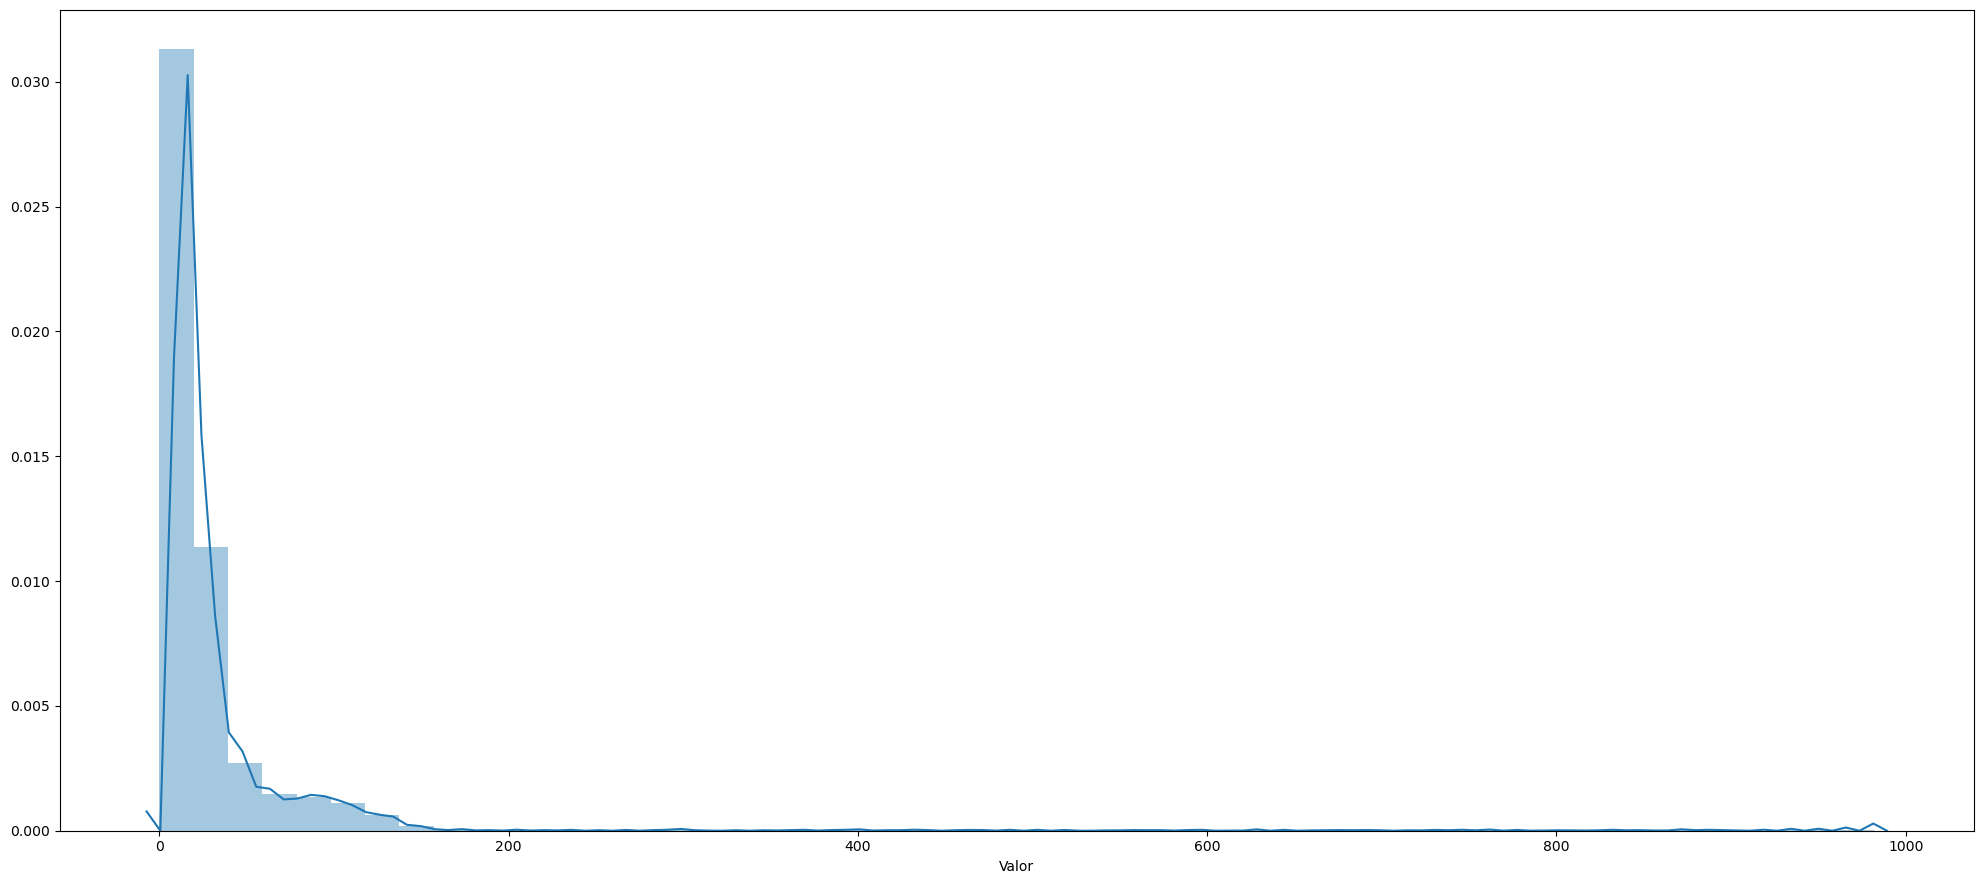

In [26]:
plt.figure(figsize=(20,9), dpi=100)

sns.distplot(df['Valor'])

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale = 1)

plt.tight_layout()

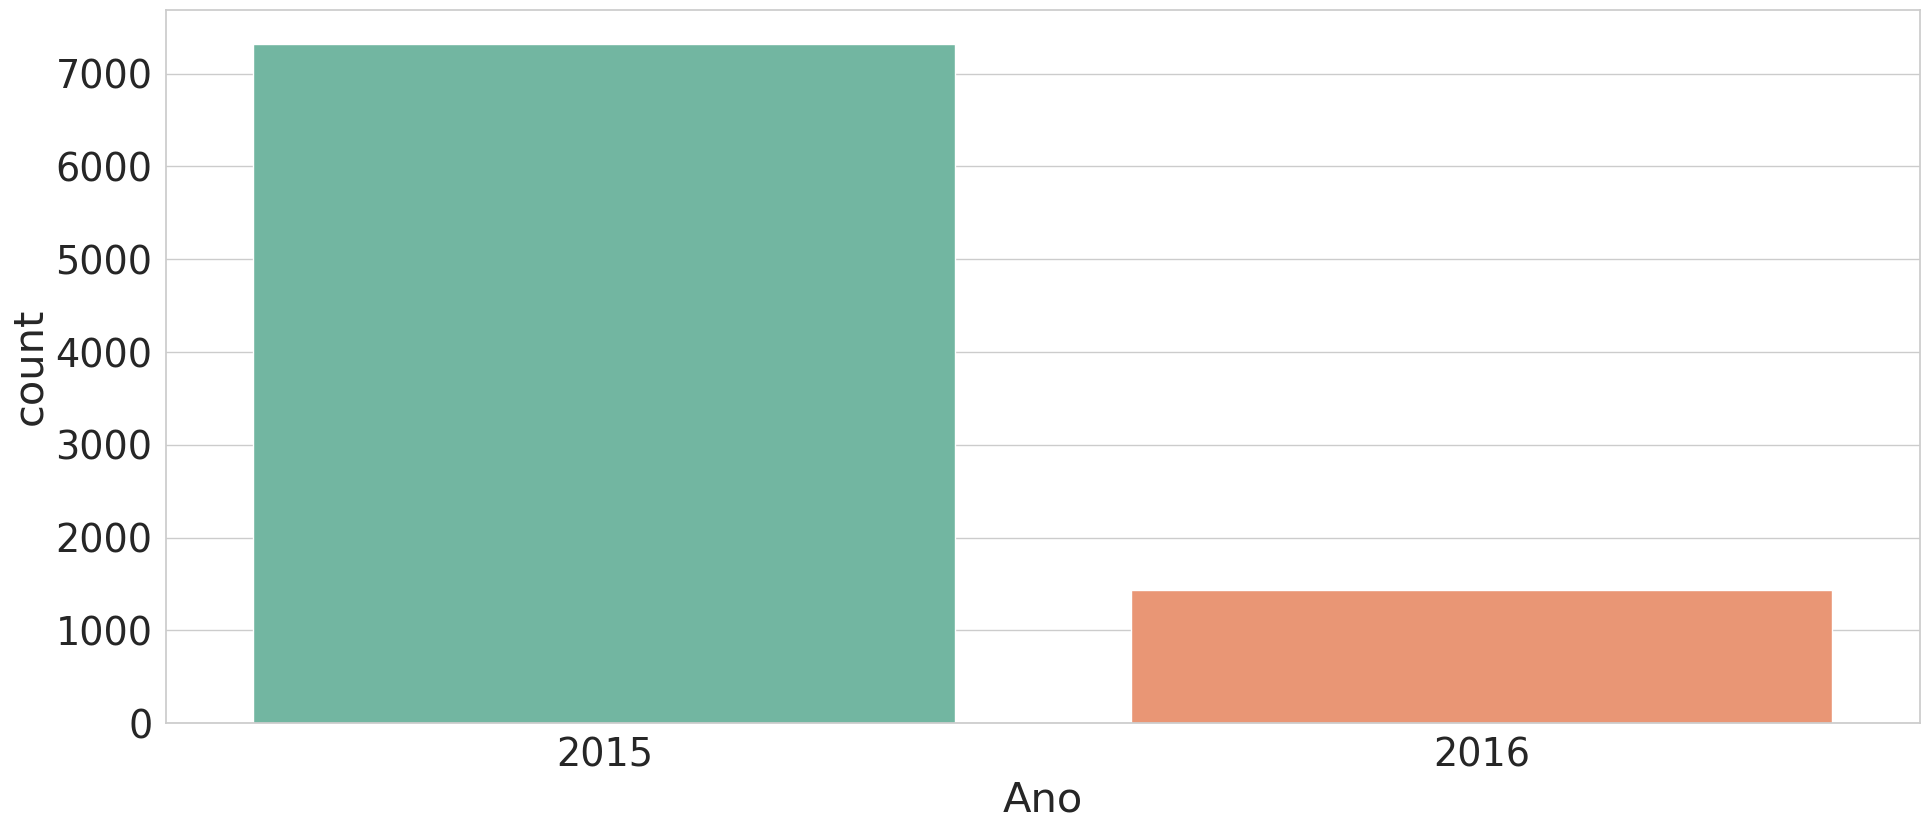

In [27]:
plt.figure(figsize=(20,9), dpi=100)

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale = 2.5)

sns.countplot(x='Ano',data = df, palette='Set2')

plt.tight_layout()

In [28]:
df['Ano'].value_counts()

2015    7319
2016    1440
Name: Ano, dtype: int64

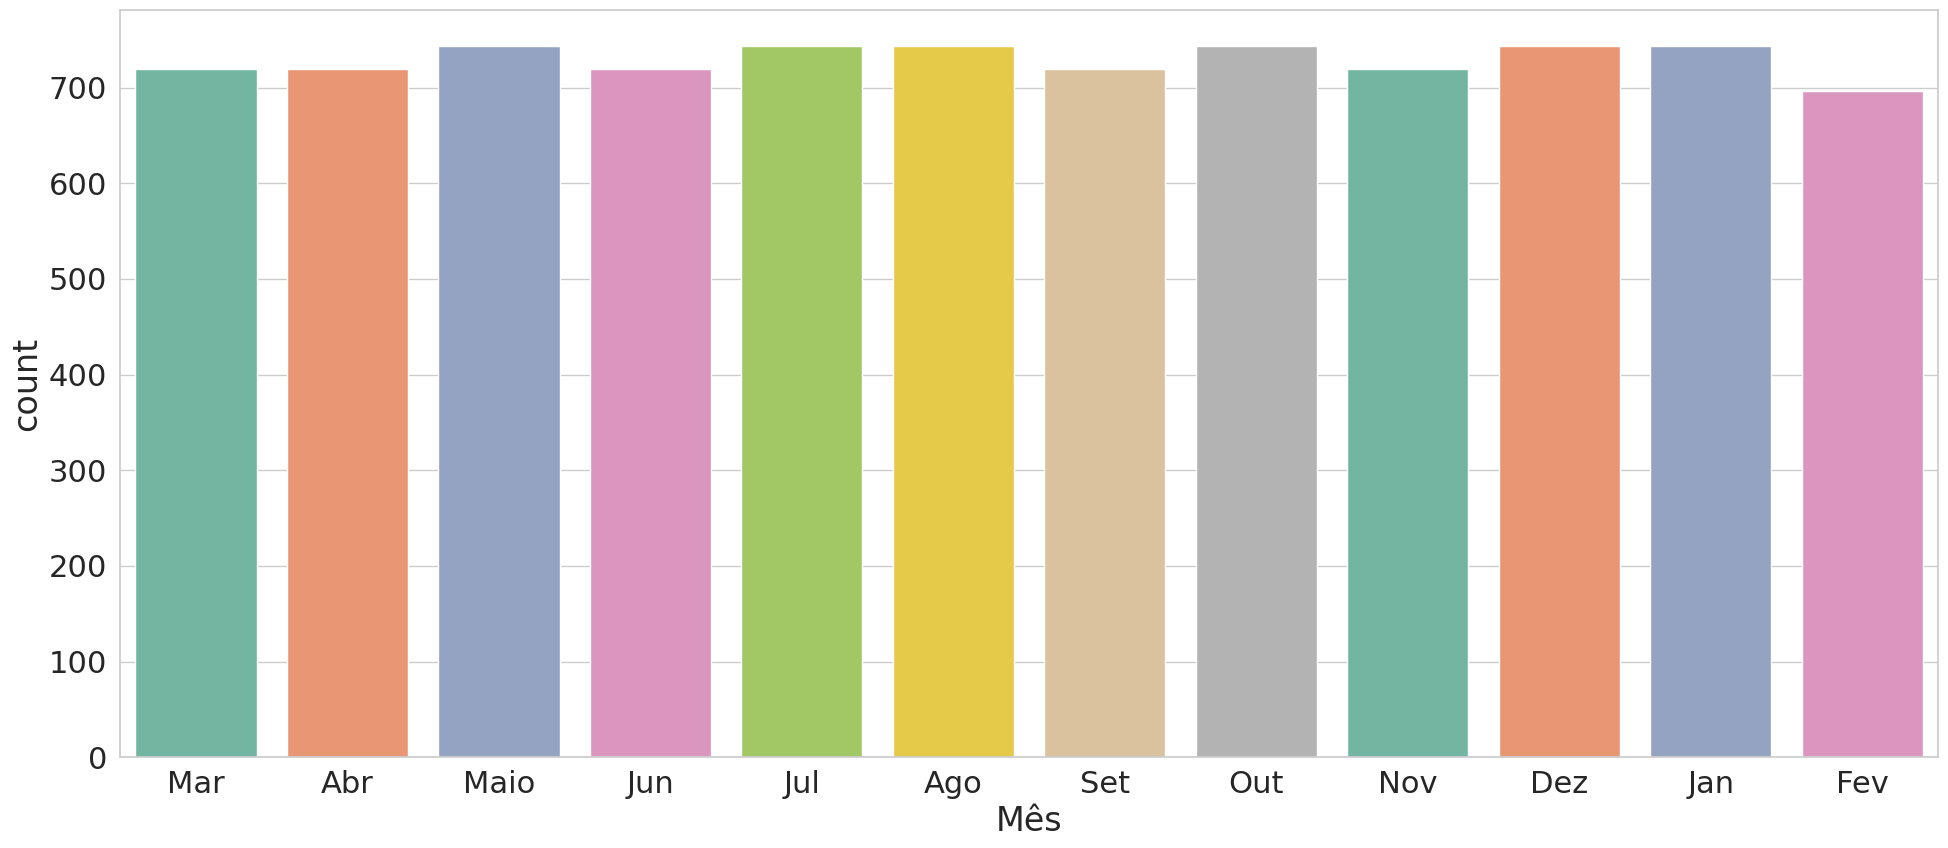

In [29]:
plt.figure(figsize=(20,9), dpi=100)

sns.set_context('notebook', font_scale = 2)

sns.countplot(x='Mês', data = df, palette='Set2')

plt.tight_layout()

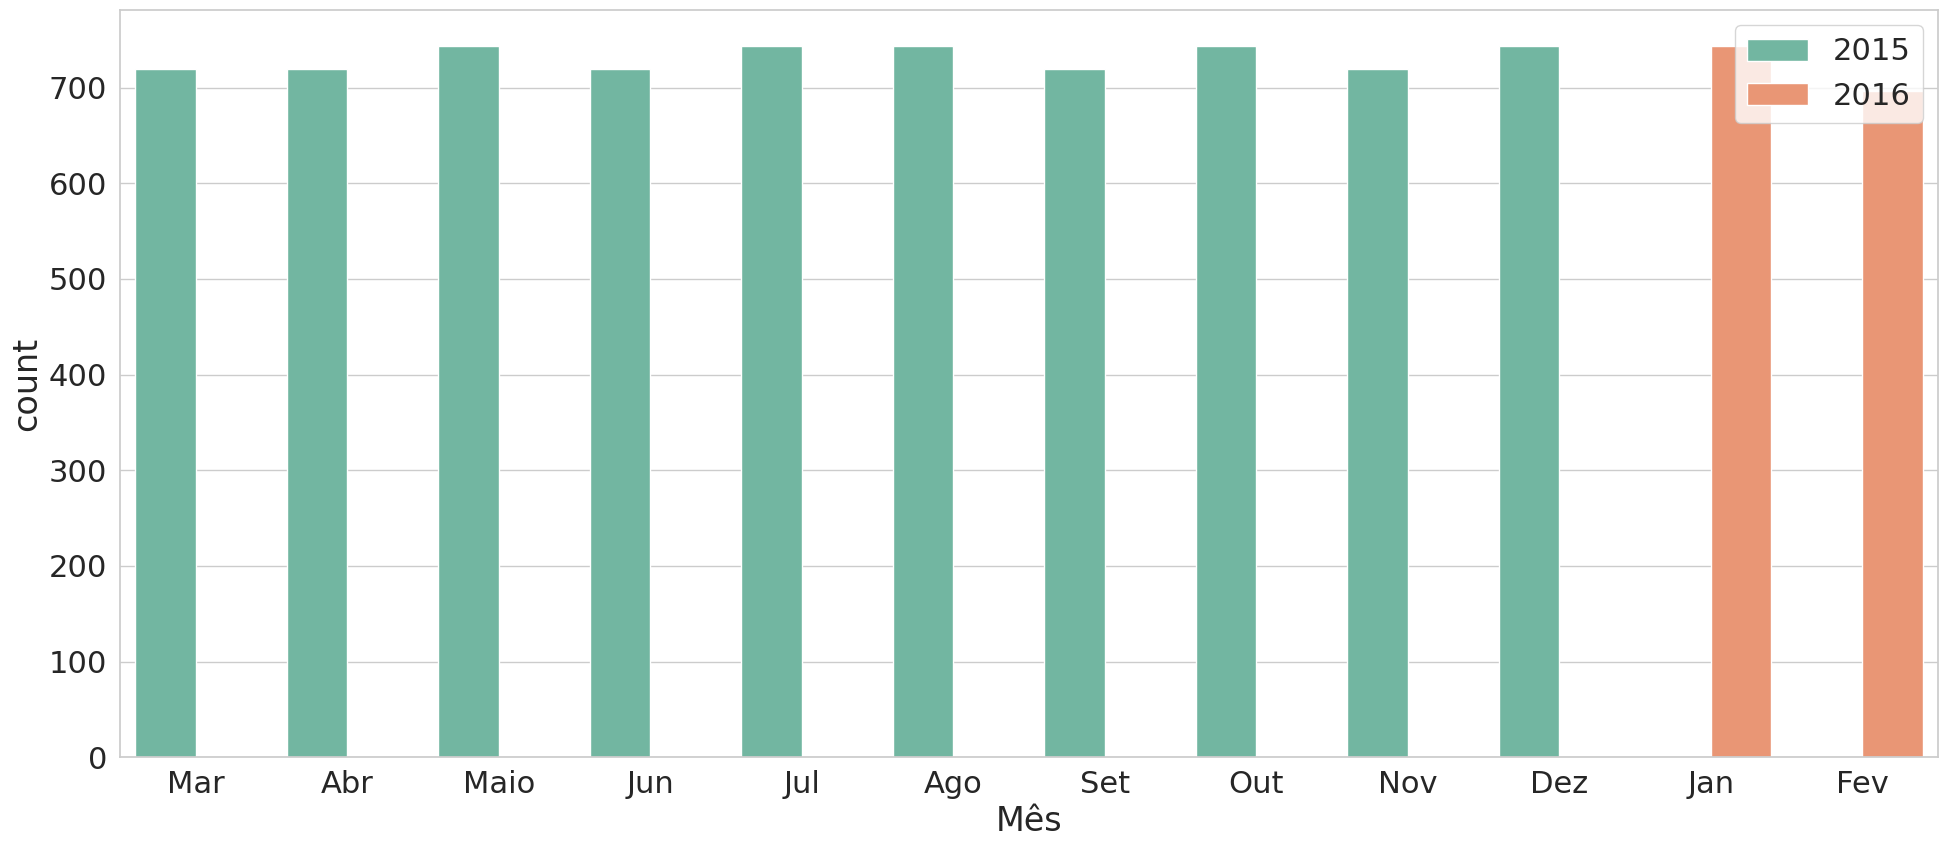

In [30]:
plt.figure(figsize=(20,9), dpi=100)

sns.set_context('notebook', font_scale = 2)

sns.countplot(x='Mês', data = df, hue = 'Ano', palette='Set2')

plt.legend(loc=0)

plt.tight_layout()

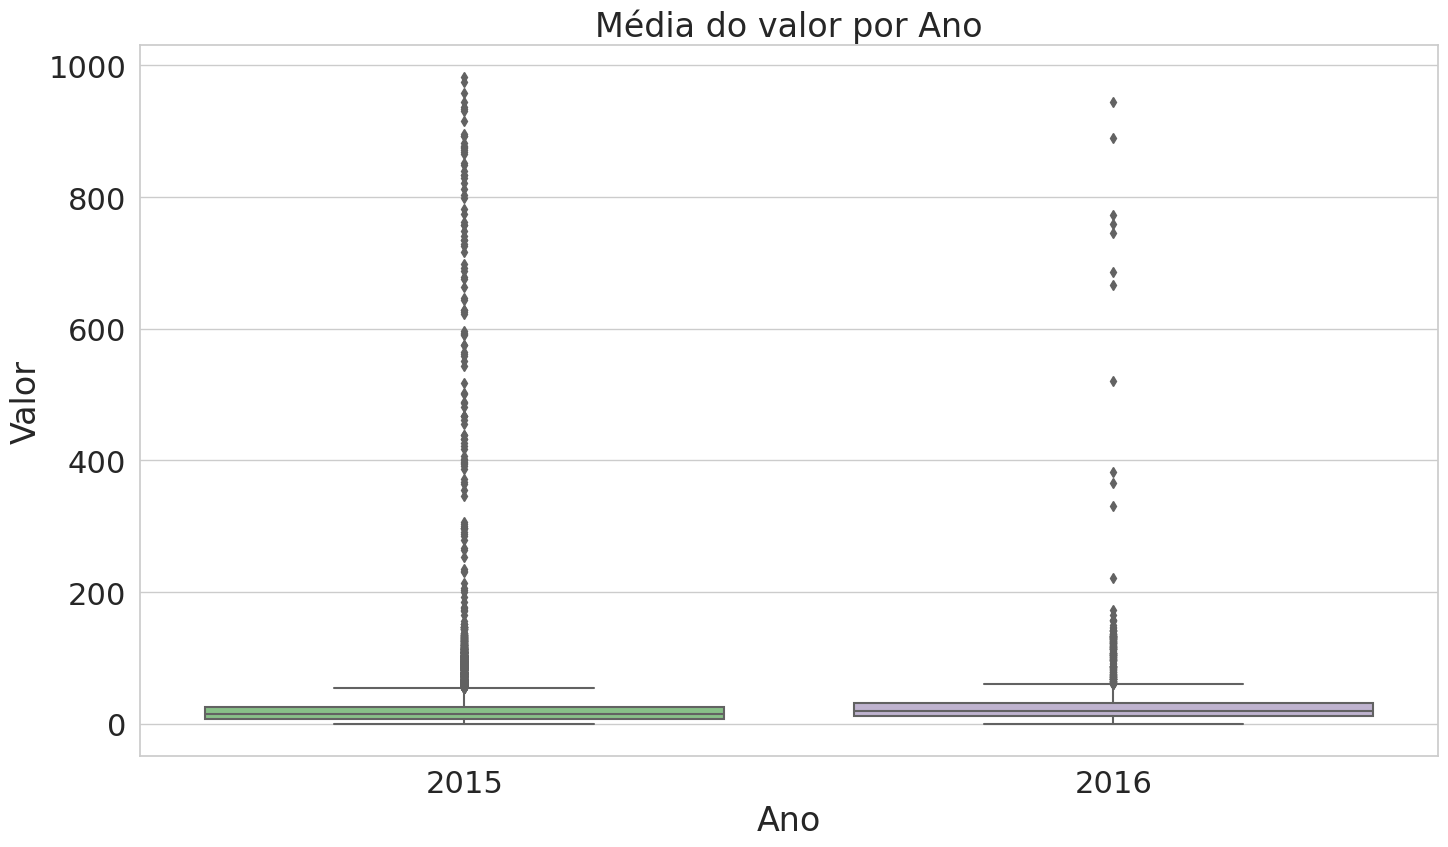

In [31]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por Ano')

sns.set_context('notebook', font_scale = 2)

sns.boxplot(x='Ano', y='Valor', data = df, palette='Accent')

plt.tight_layout()

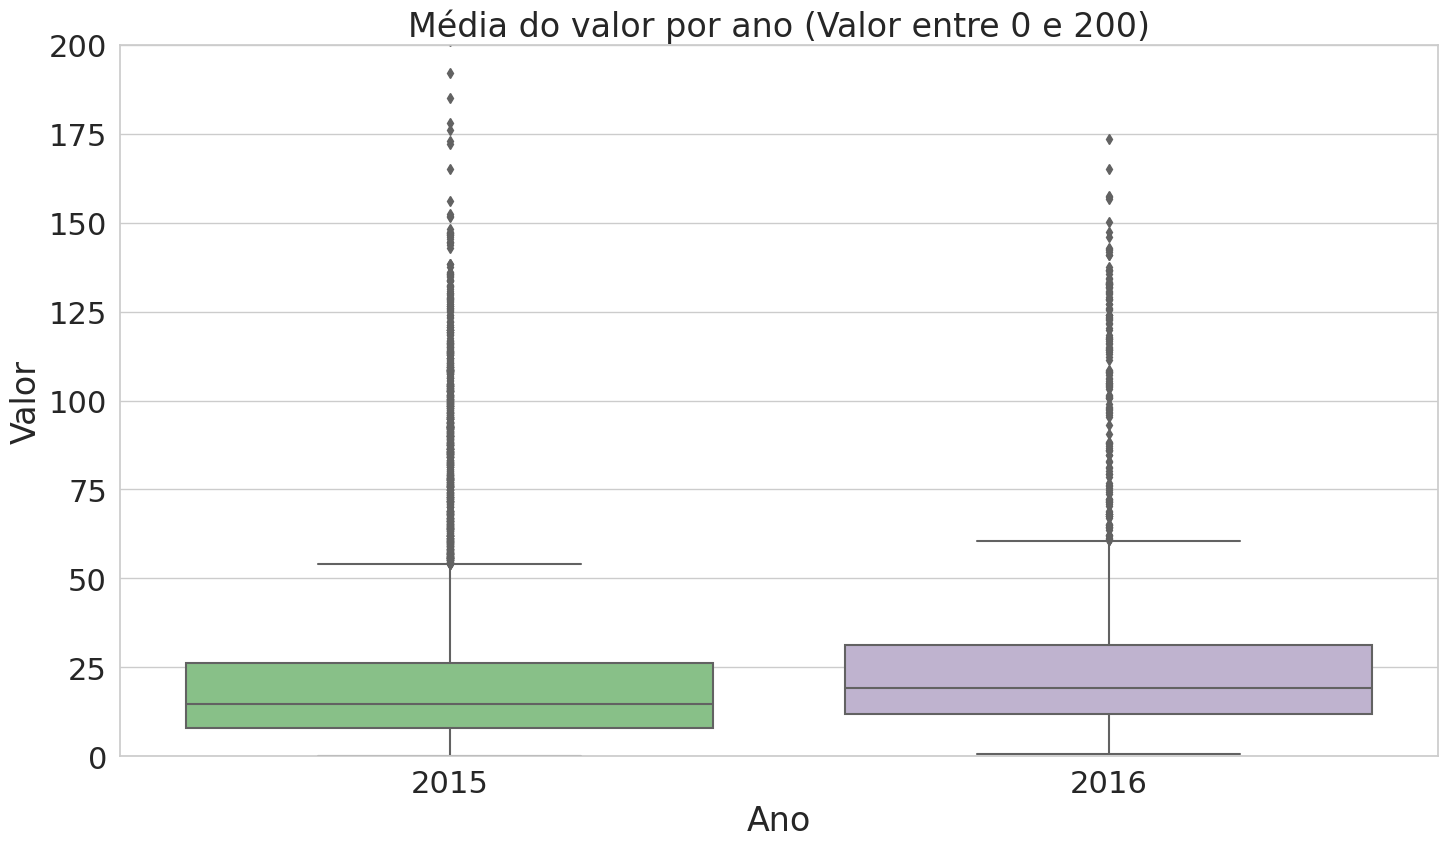

In [32]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por ano (Valor entre 0 e 200)')

sns.boxplot(x='Ano', y='Valor', data = df, palette='Accent')

plt.ylim([0,200])

plt.tight_layout()

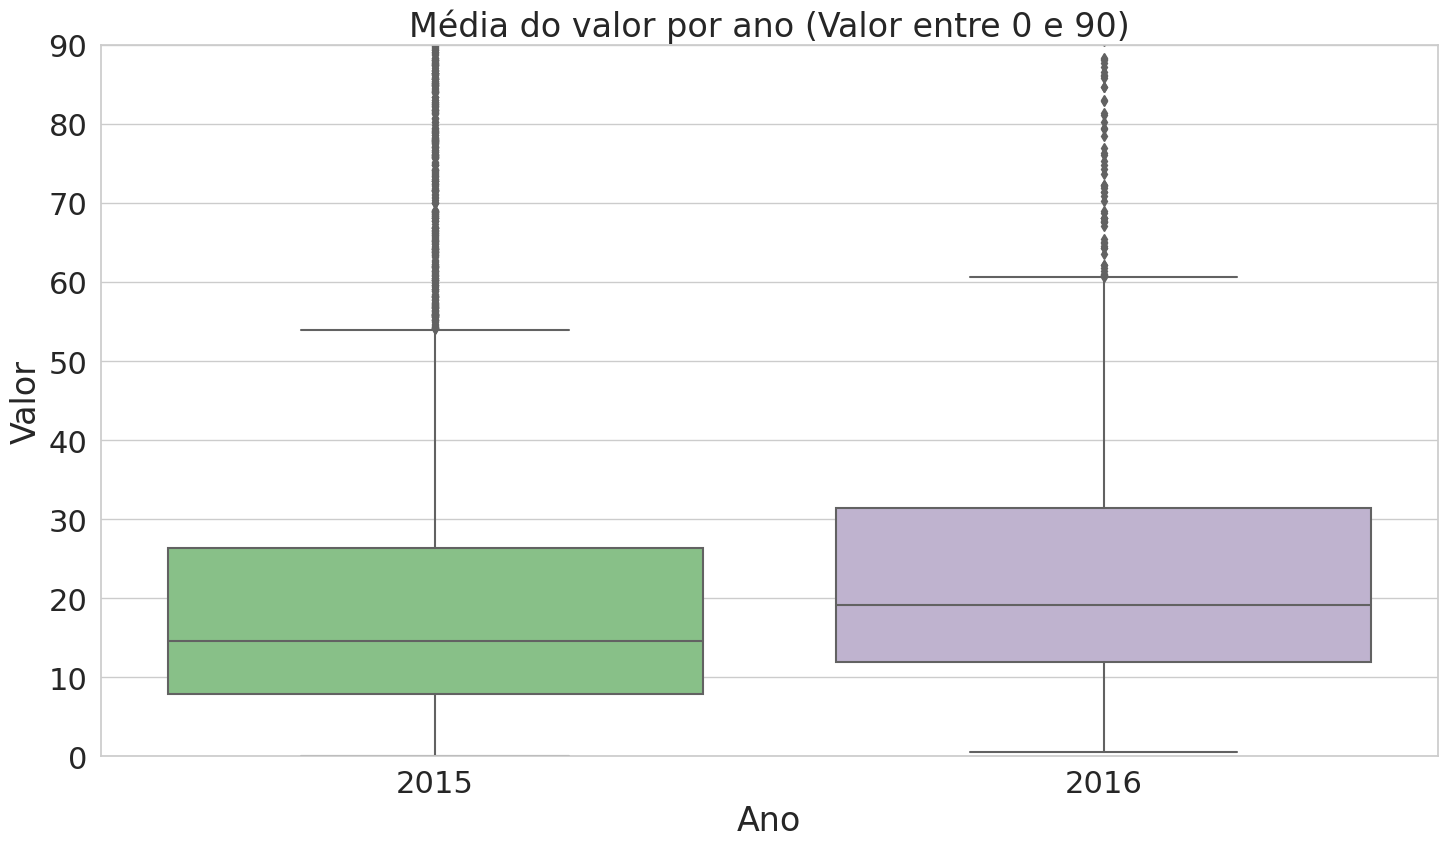

In [33]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por ano (Valor entre 0 e 90)')

sns.boxplot(x='Ano', y='Valor', data = df, palette='Accent')

plt.ylim([0,90])

plt.tight_layout()

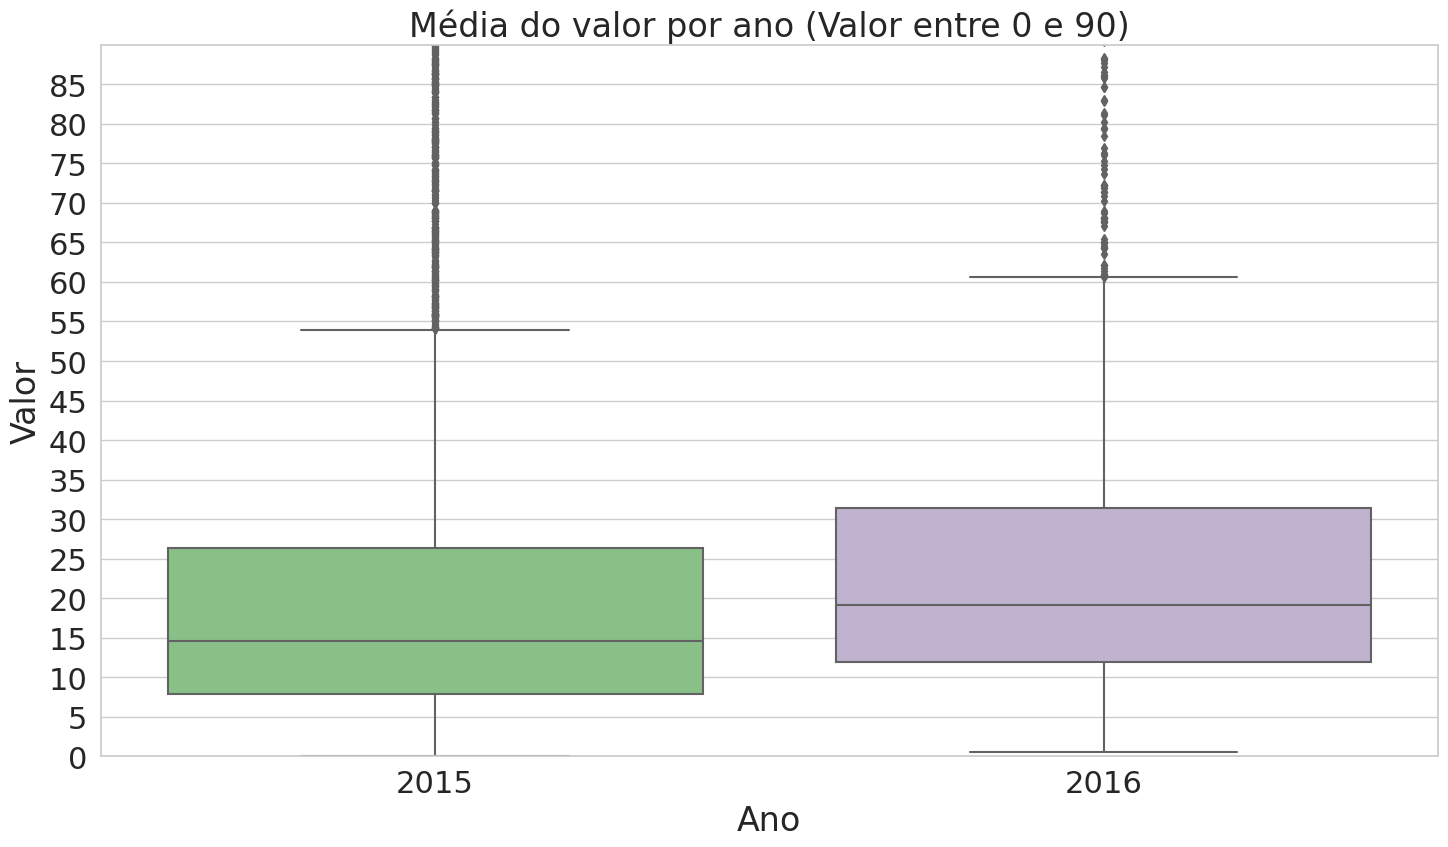

In [34]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por ano (Valor entre 0 e 90)')

sns.boxplot(x='Ano', y='Valor', data = df, palette='Accent')

plt.ylim([0,90])

plt.yticks(np.arange(0,90,5))

plt.tight_layout()

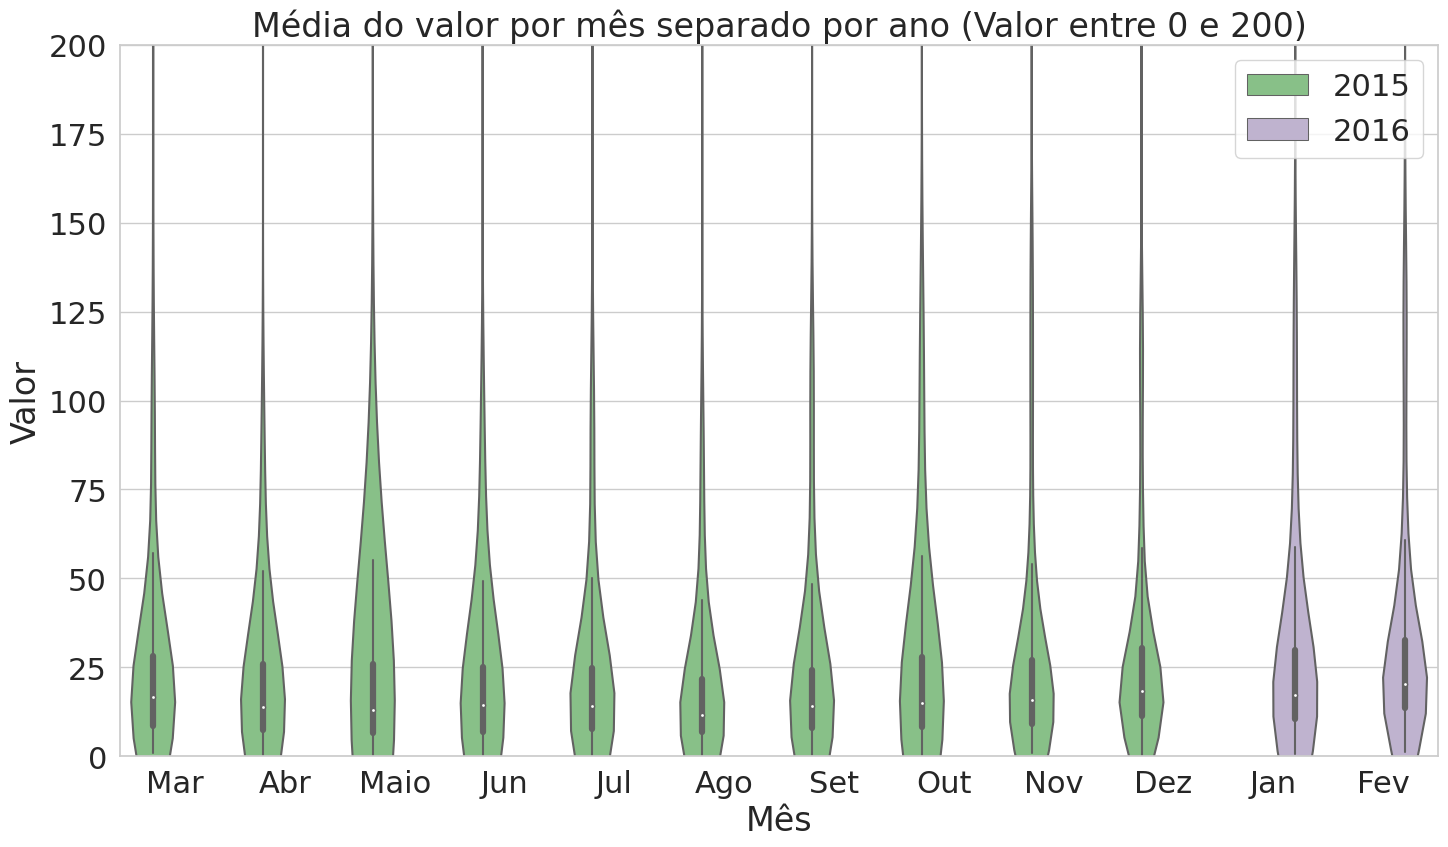

In [35]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por mês separado por ano (Valor entre 0 e 200)')

sns.violinplot(x = 'Mês', y = 'Valor', data = df, hue='Ano', palette='Accent')

plt.ylim([0,200])

plt.legend(loc=0)

#plt.yticks(np.arange(0,90,5))

plt.tight_layout()

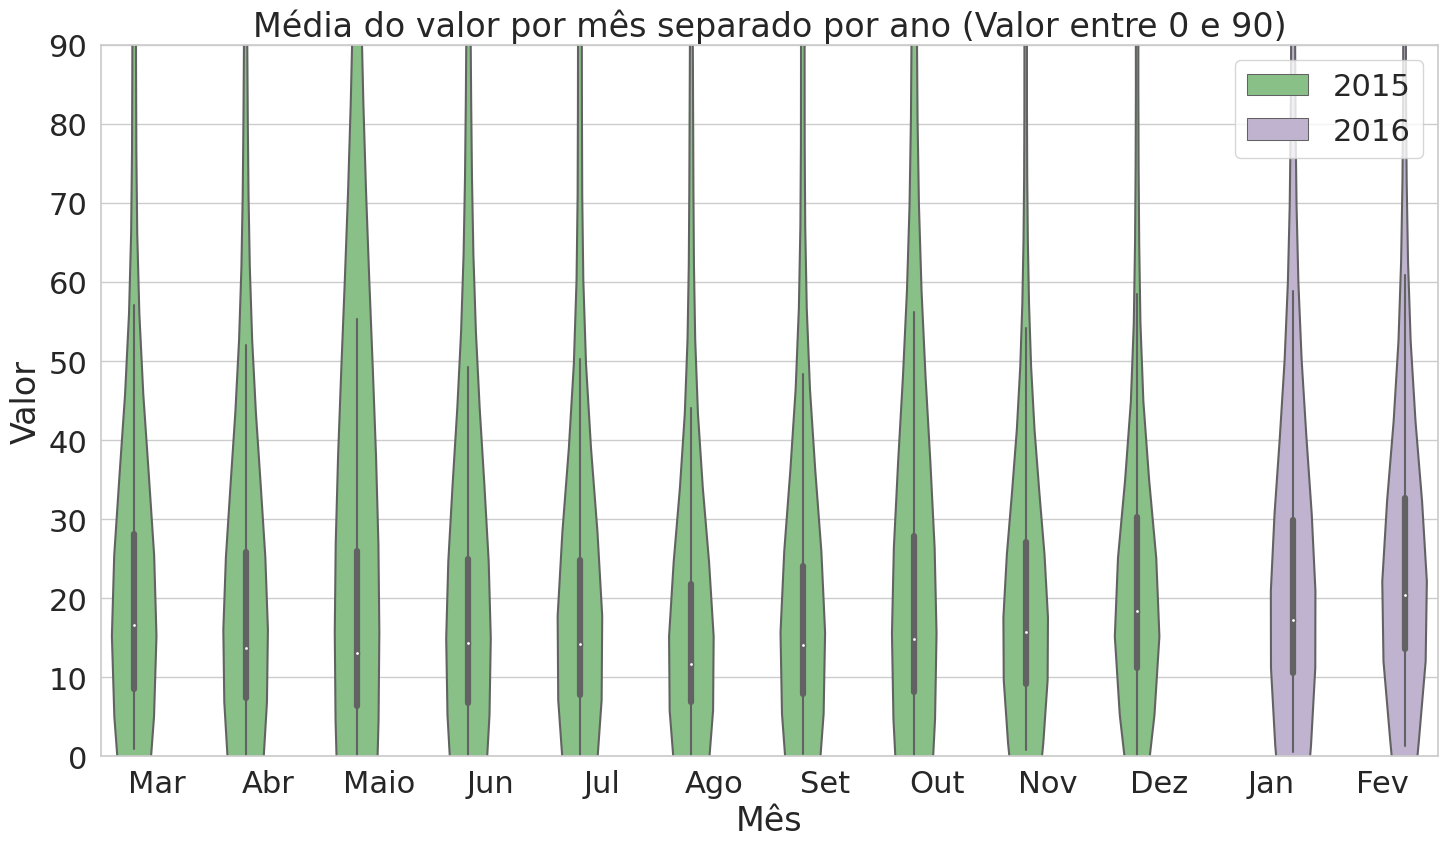

In [36]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por mês separado por ano (Valor entre 0 e 90)')

sns.violinplot(x = 'Mês', y = 'Valor', data = df, hue='Ano', palette='Accent')

plt.ylim([0,90])

#plt.yticks(np.arange(0,90,5))

plt.legend(loc=0)

plt.tight_layout()

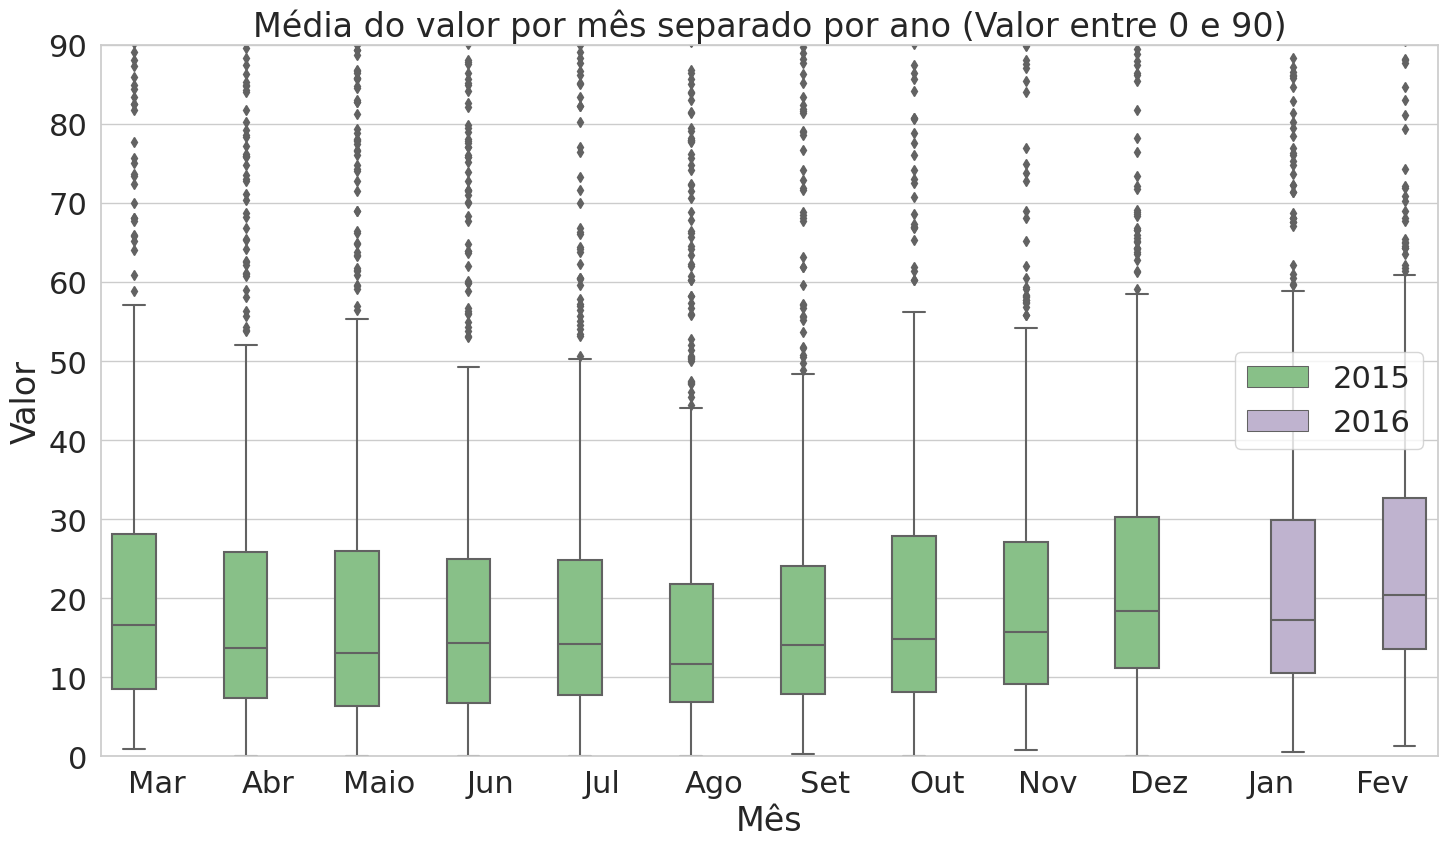

In [37]:
plt.figure(figsize=(15,9), dpi=100)

plt.title('Média do valor por mês separado por ano (Valor entre 0 e 90)')

sns.boxplot(x = 'Mês', y = 'Valor', data = df, hue='Ano', palette='Accent')

plt.ylim([0,90])

#plt.yticks(np.arange(0,90,5))

plt.legend(loc=0)

plt.tight_layout()

In [38]:
#A pivot table usando média aritmética como group by
pivot_df = df.pivot_table(index='Mês',columns='Dia', values='Valor')

In [39]:
pivot_df

Dia,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Mês,,,,,,,,,,,,,,,,,,,,,
Abr,46.486167,26.528292,18.036208,13.413292,48.478875,11.772917,21.034583,22.937250,21.240583,22.092250,...,25.991375,29.840208,24.229292,63.212750,41.687208,18.204042,24.670875,20.326125,29.024500,NaN
Ago,53.970083,43.076917,16.947250,22.717708,26.449542,24.790583,20.766667,31.692000,16.561042,28.841208,...,33.482792,10.808083,12.291750,24.631125,22.952917,26.318833,25.090792,18.944958,32.788458,14.879167
Dez,33.510083,37.098292,30.069875,36.834667,29.397833,21.923833,15.167875,22.673000,19.866583,34.499333,...,41.791500,31.300292,66.663000,20.092292,18.659125,32.730417,16.361708,29.216583,38.435250,29.305792
Fev,23.883667,36.623167,33.877667,38.272667,31.533083,30.250333,20.539083,22.517958,34.990833,38.731417,...,21.590750,37.033958,35.958583,35.057625,34.003583,46.135208,60.232000,30.074458,NaN,NaN
Jan,55.680375,12.187542,24.058333,19.799875,62.843083,62.088208,19.555333,29.280417,48.274792,15.106875,...,31.791625,39.926625,50.270375,23.000167,29.859875,29.147167,30.564167,34.208792,54.792250,41.063250
Jul,23.506000,26.326167,31.072583,18.859583,35.111125,51.020917,28.889667,26.068875,31.516917,27.893625,...,22.602125,24.460625,27.517917,29.735708,8.342333,19.199292,23.115167,23.122417,27.925042,19.763583
Jun,36.515417,24.828542,22.202000,22.930083,36.360500,13.672667,47.503333,46.486667,25.888208,21.485833,...,43.120875,30.256667,24.682292,27.569333,22.733208,40.582792,23.162792,14.963292,26.744333,NaN
Maio,72.365583,54.942625,61.524583,17.386792,26.512958,26.737500,23.566000,26.579542,55.633458,142.955292,...,22.341167,50.798917,41.422042,66.955875,45.724042,22.551875,18.489125,21.573500,132.920458,43.884250
Mar,NaN,16.067042,30.032750,26.681250,29.161917,19.826208,37.567292,40.416375,18.850750,25.877833,...,11.415250,39.282250,35.905042,32.209208,27.972167,27.243625,27.527542,82.938609,40.022833,22.723875


In [40]:
df = df.sort_values(by='datetime')

In [41]:
df2015 = df[ df['Ano'] == 2015]

In [42]:
df2016 = df[ df['Ano'] == 2016]

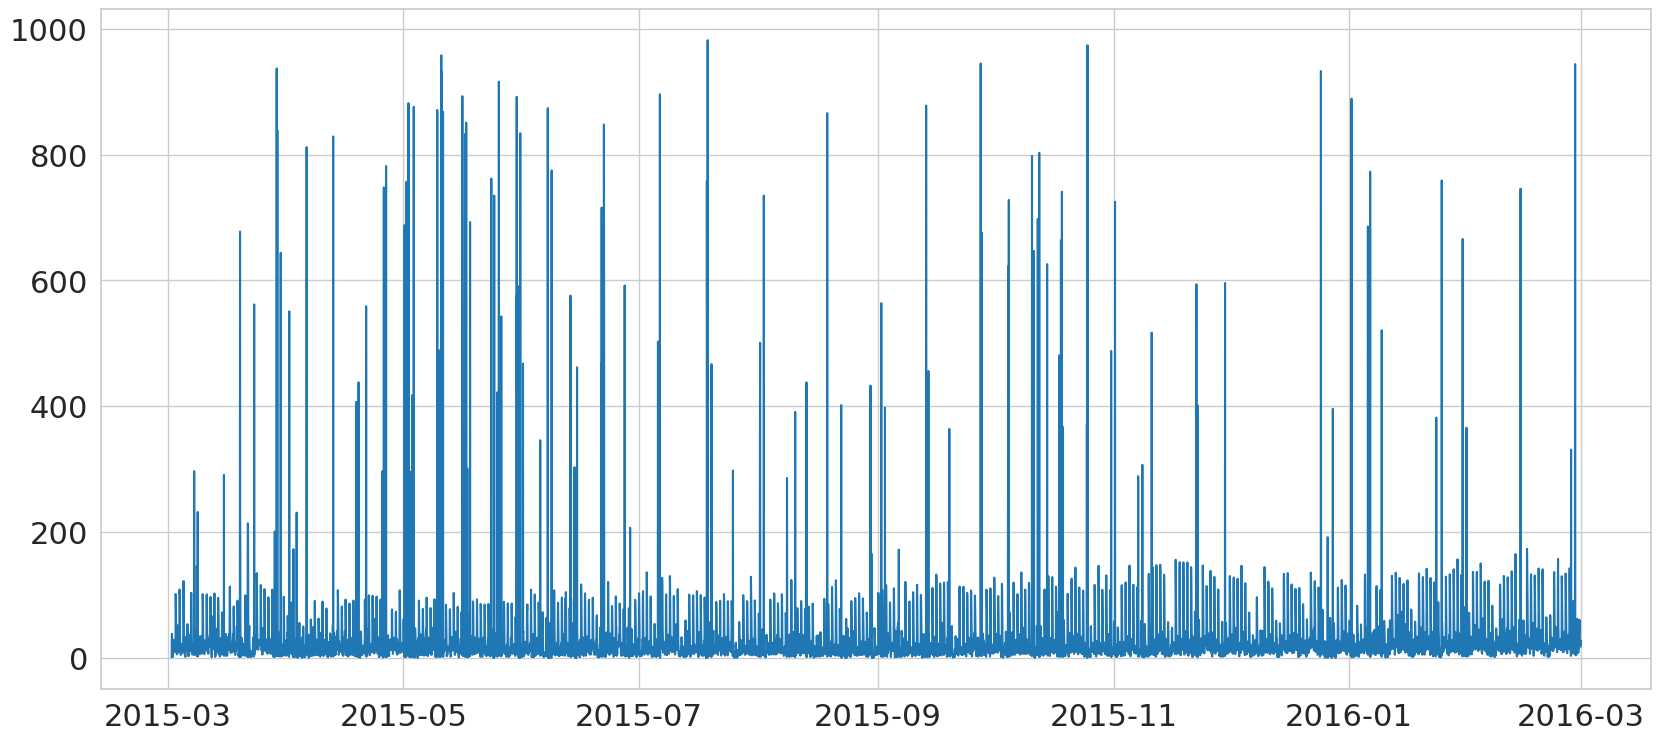

In [43]:
plt.figure(figsize=(20,9), dpi=100)

plt.plot(df['datetime'], df['Valor'])

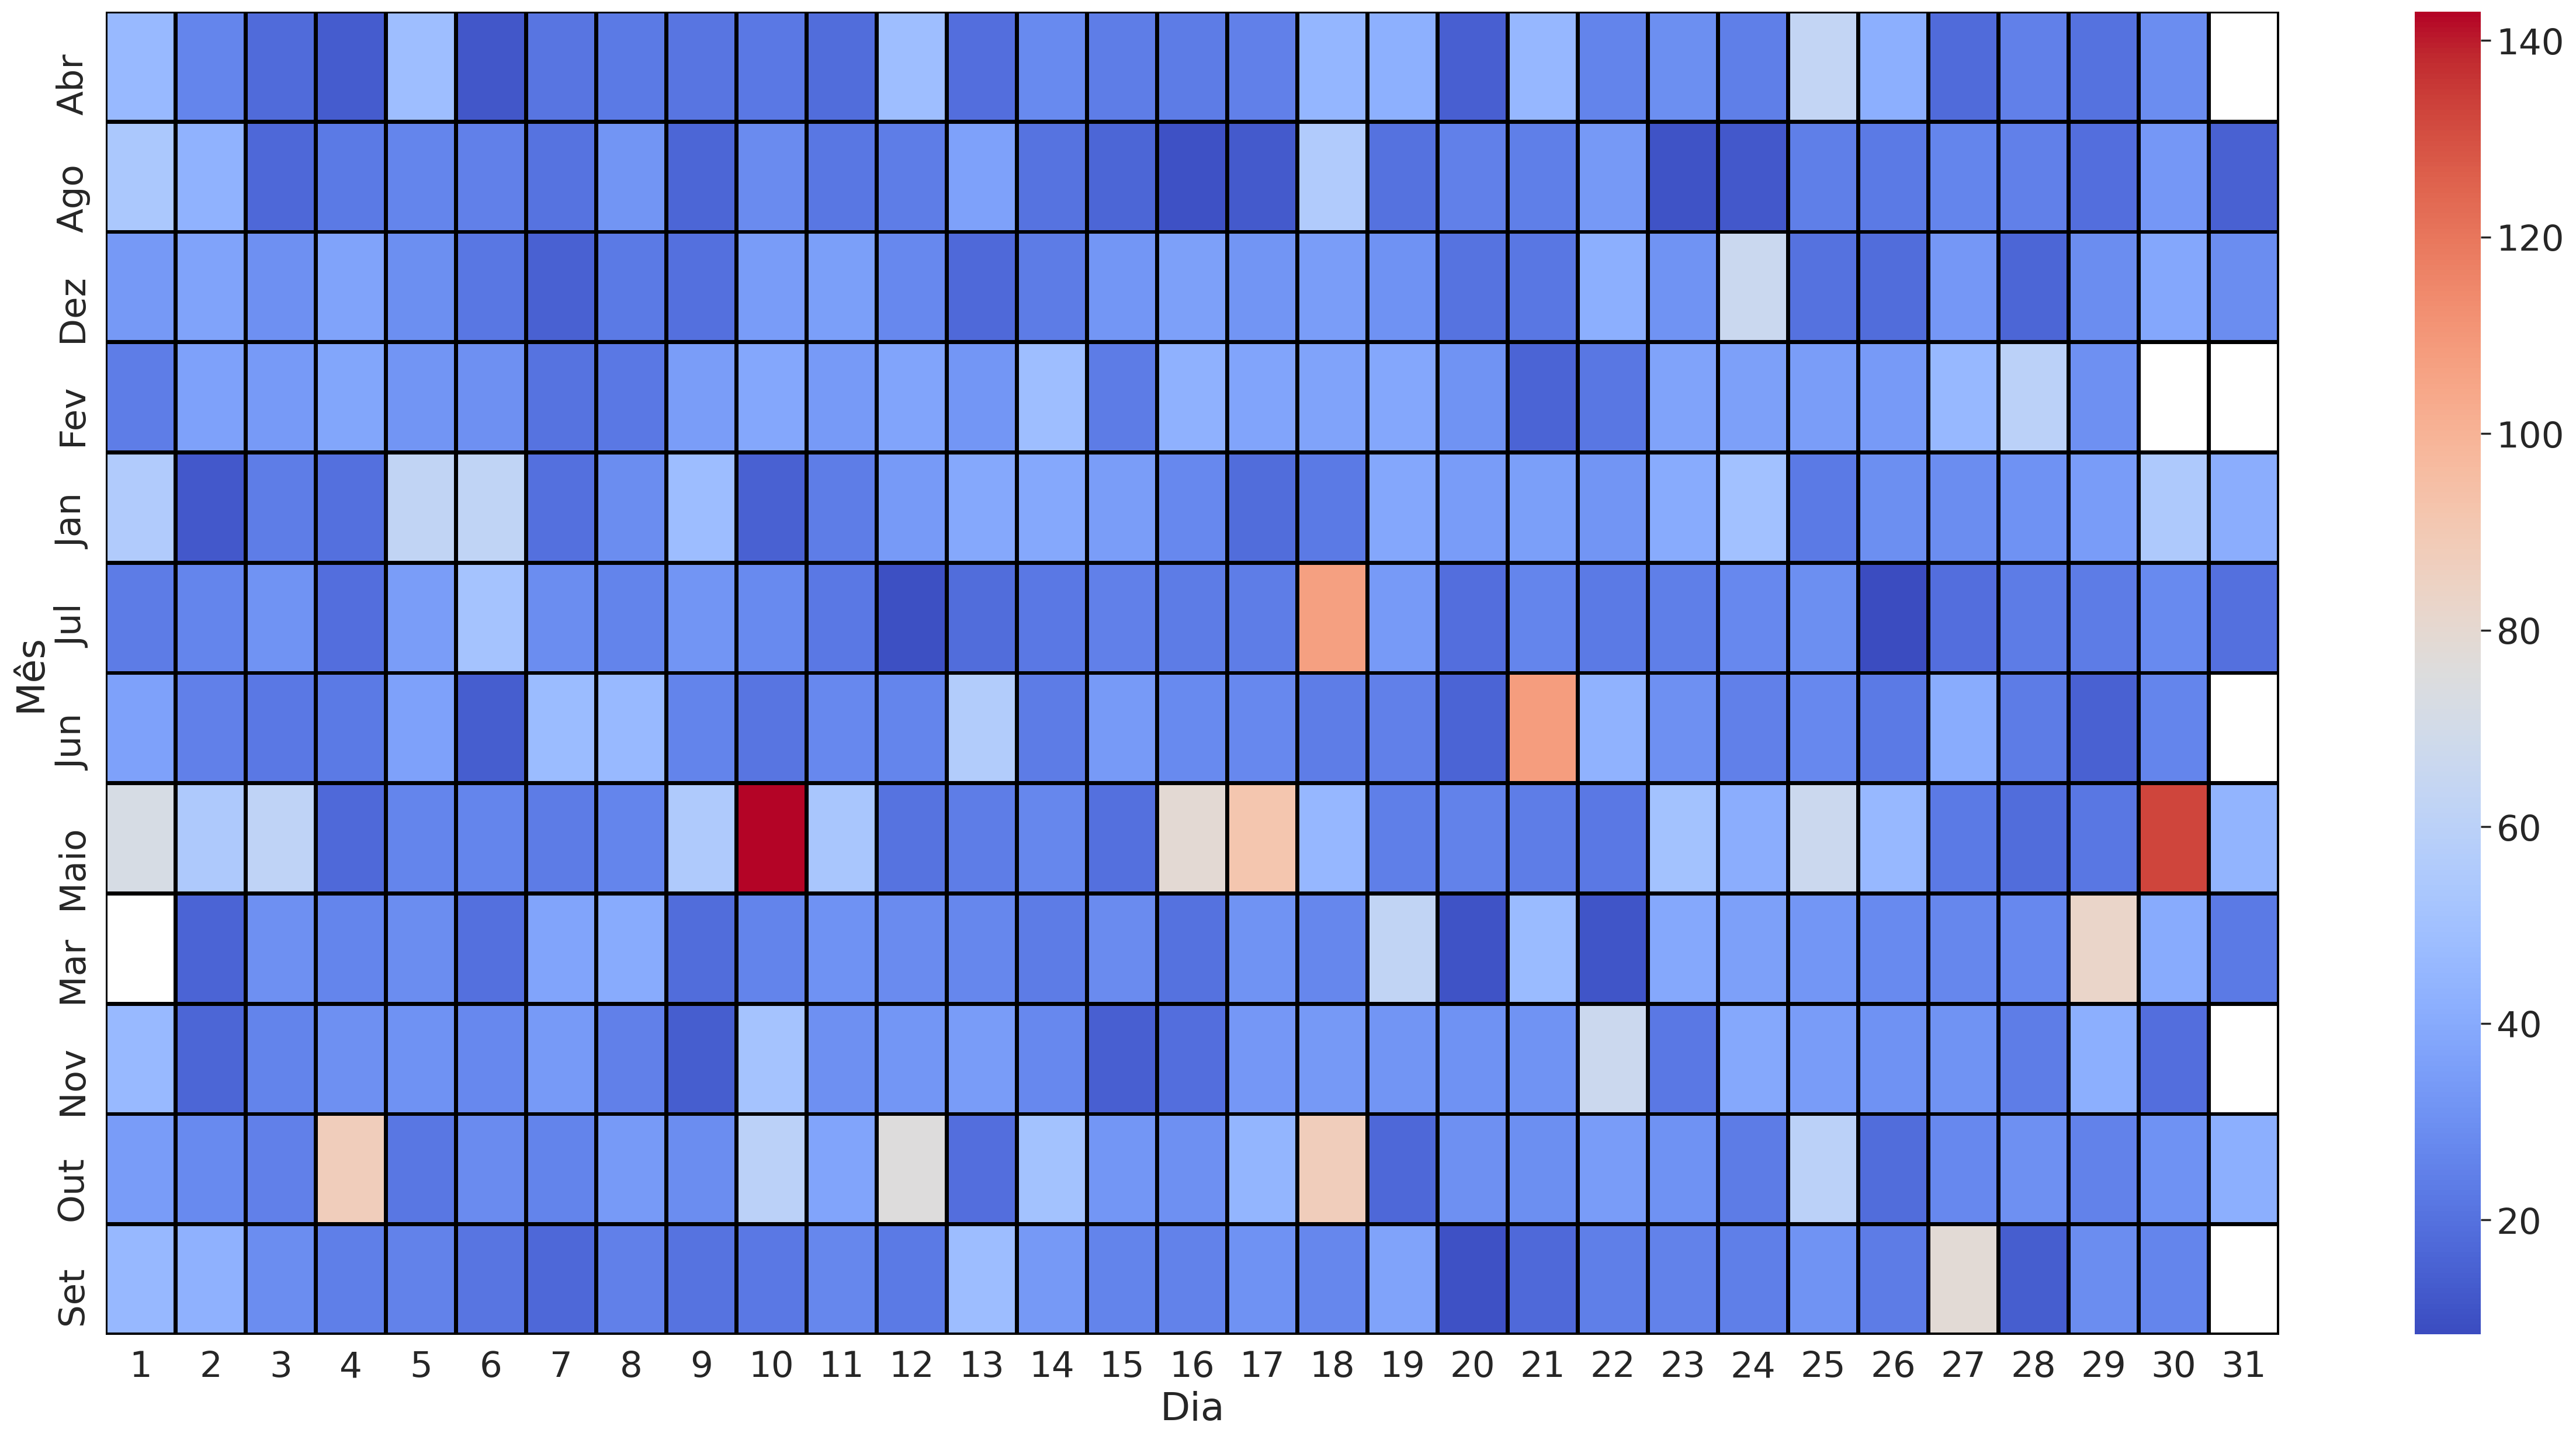

In [44]:
plt.figure(figsize=(30,15), dpi=200)

sns.heatmap(pivot_df, cmap='coolwarm', lw=2, linecolor='black')

In [45]:
#A pivot table usando média aritmética como group by
pivot_df2015 = df2015.pivot_table(index='Mês',columns='Dia', values='Valor')

In [46]:
#A pivot table usando média aritmética como group by
pivot_df2016 = df2016.pivot_table(index='Mês',columns='Dia', values='Valor')

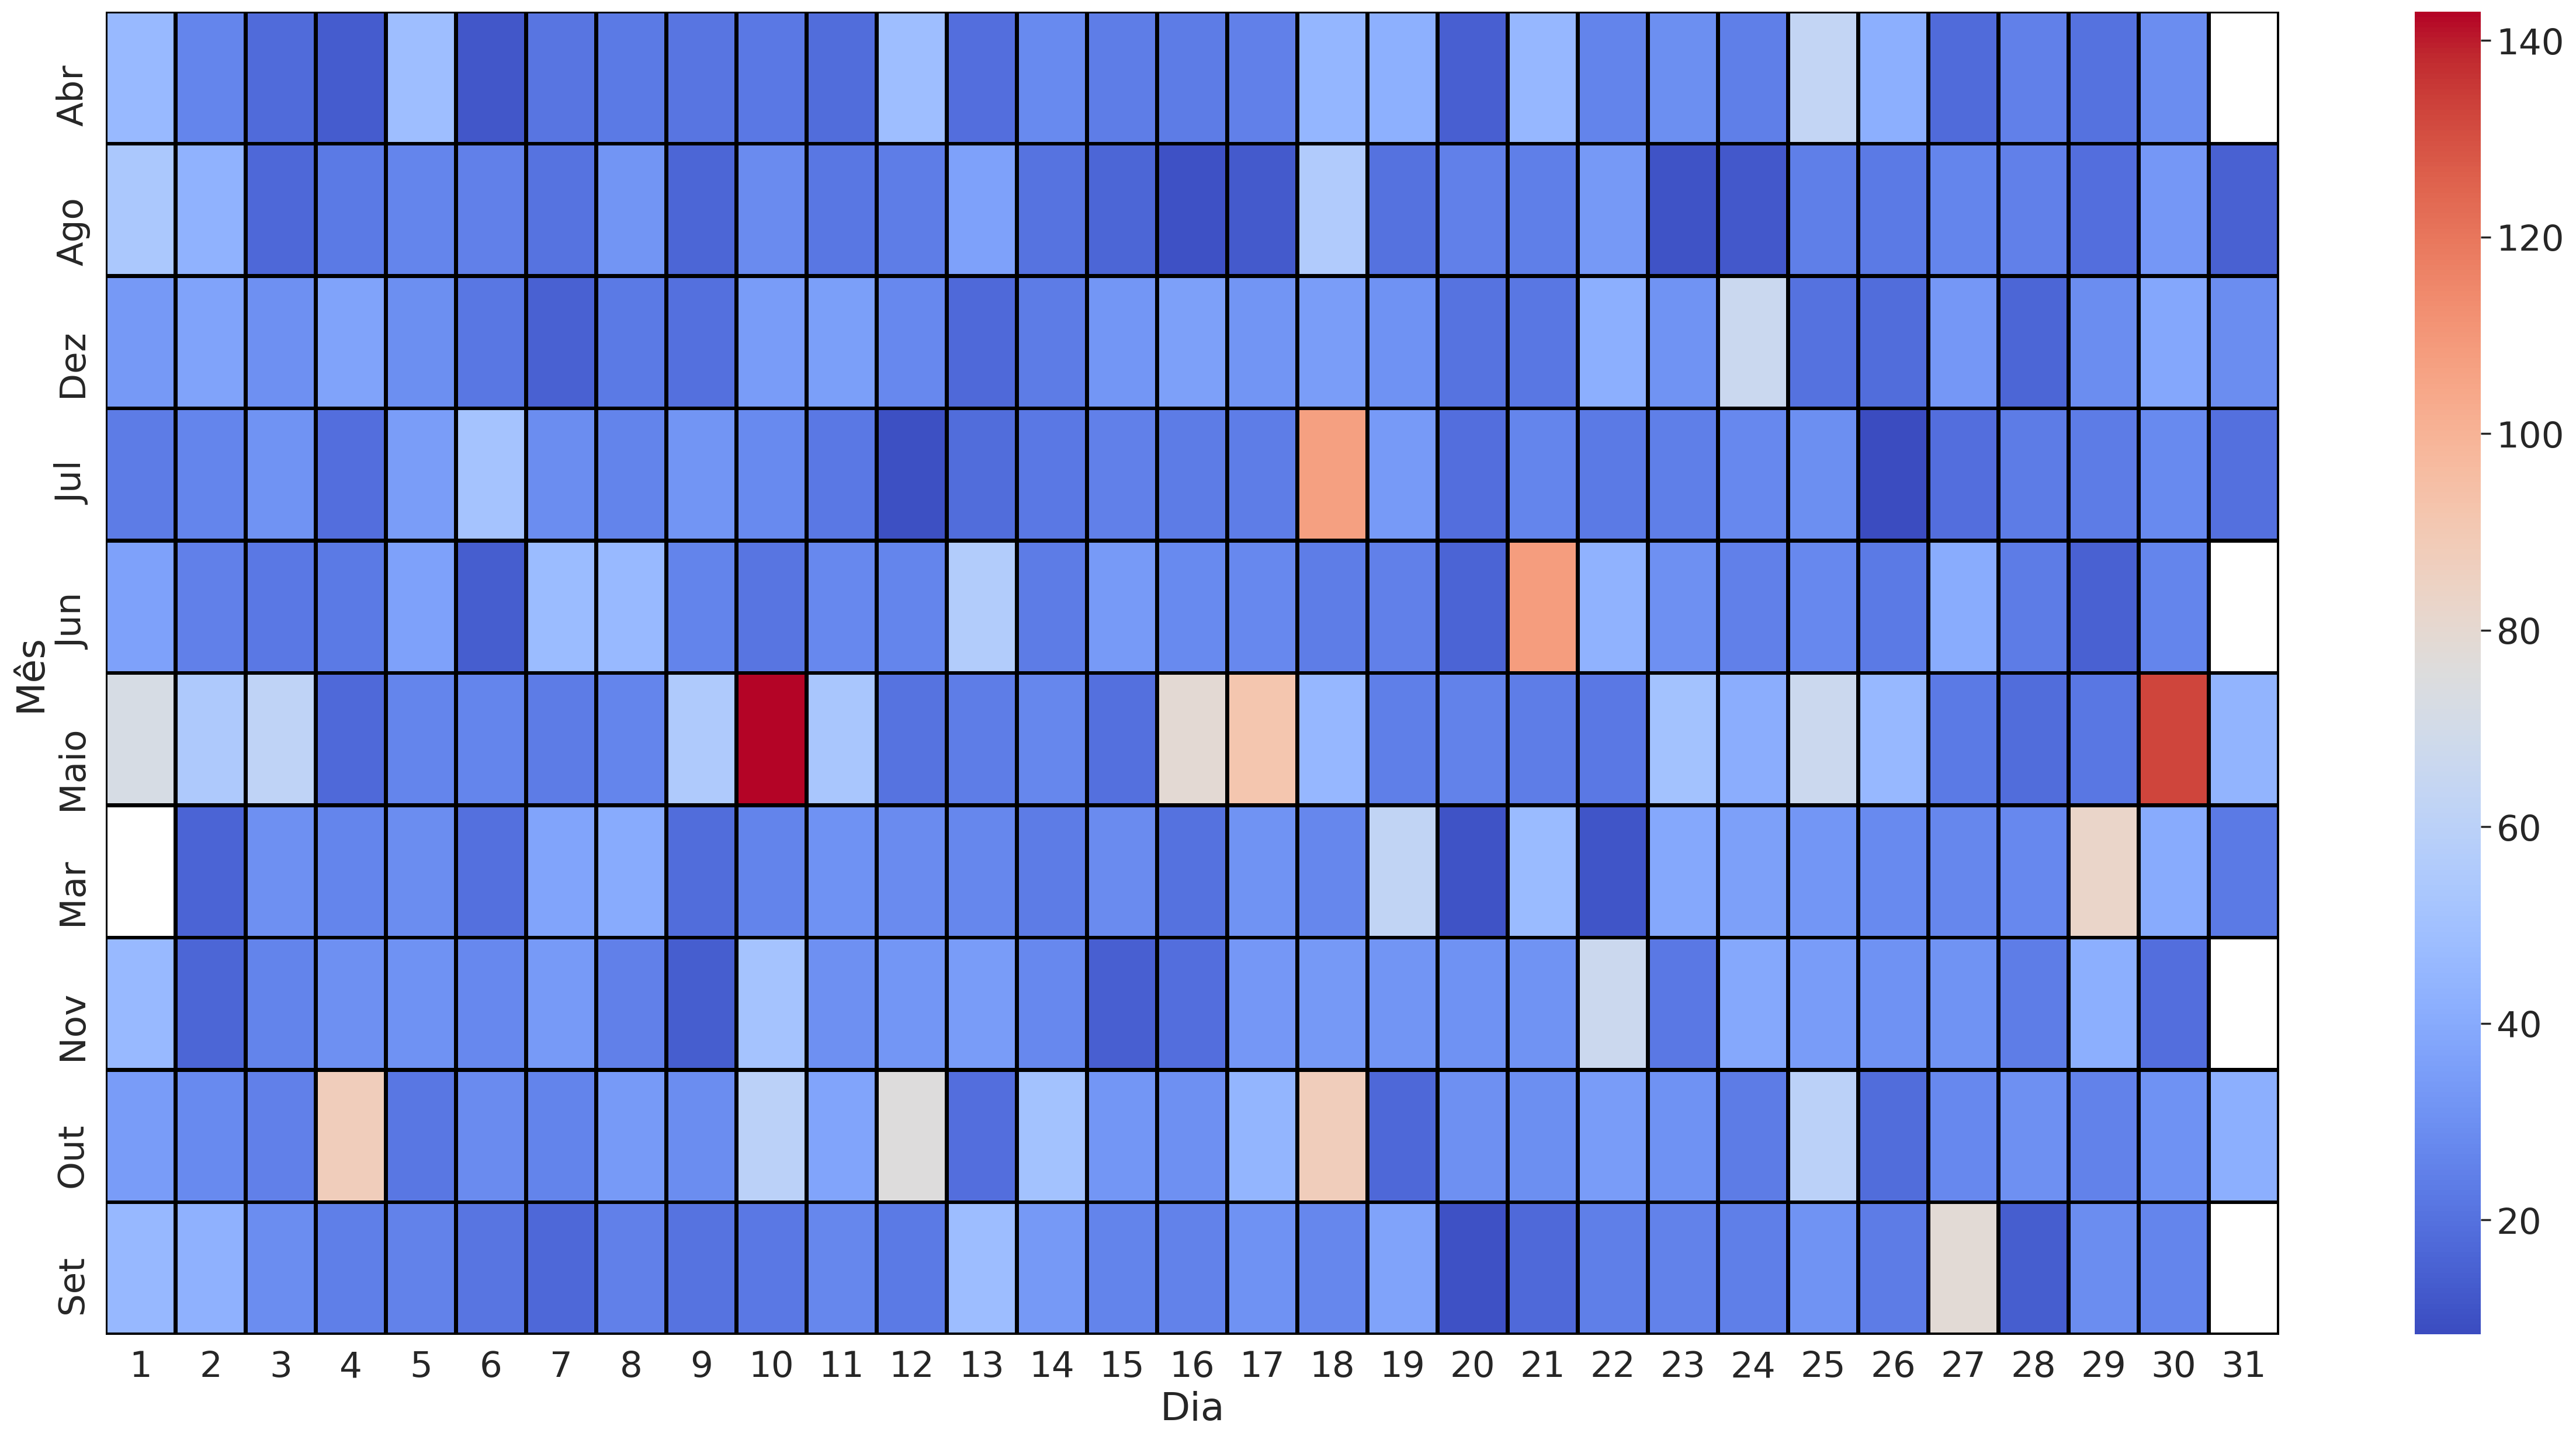

In [47]:
plt.figure(figsize=(30,15), dpi=200)

sns.heatmap(pivot_df2015, cmap='coolwarm', lw=2, linecolor='black')

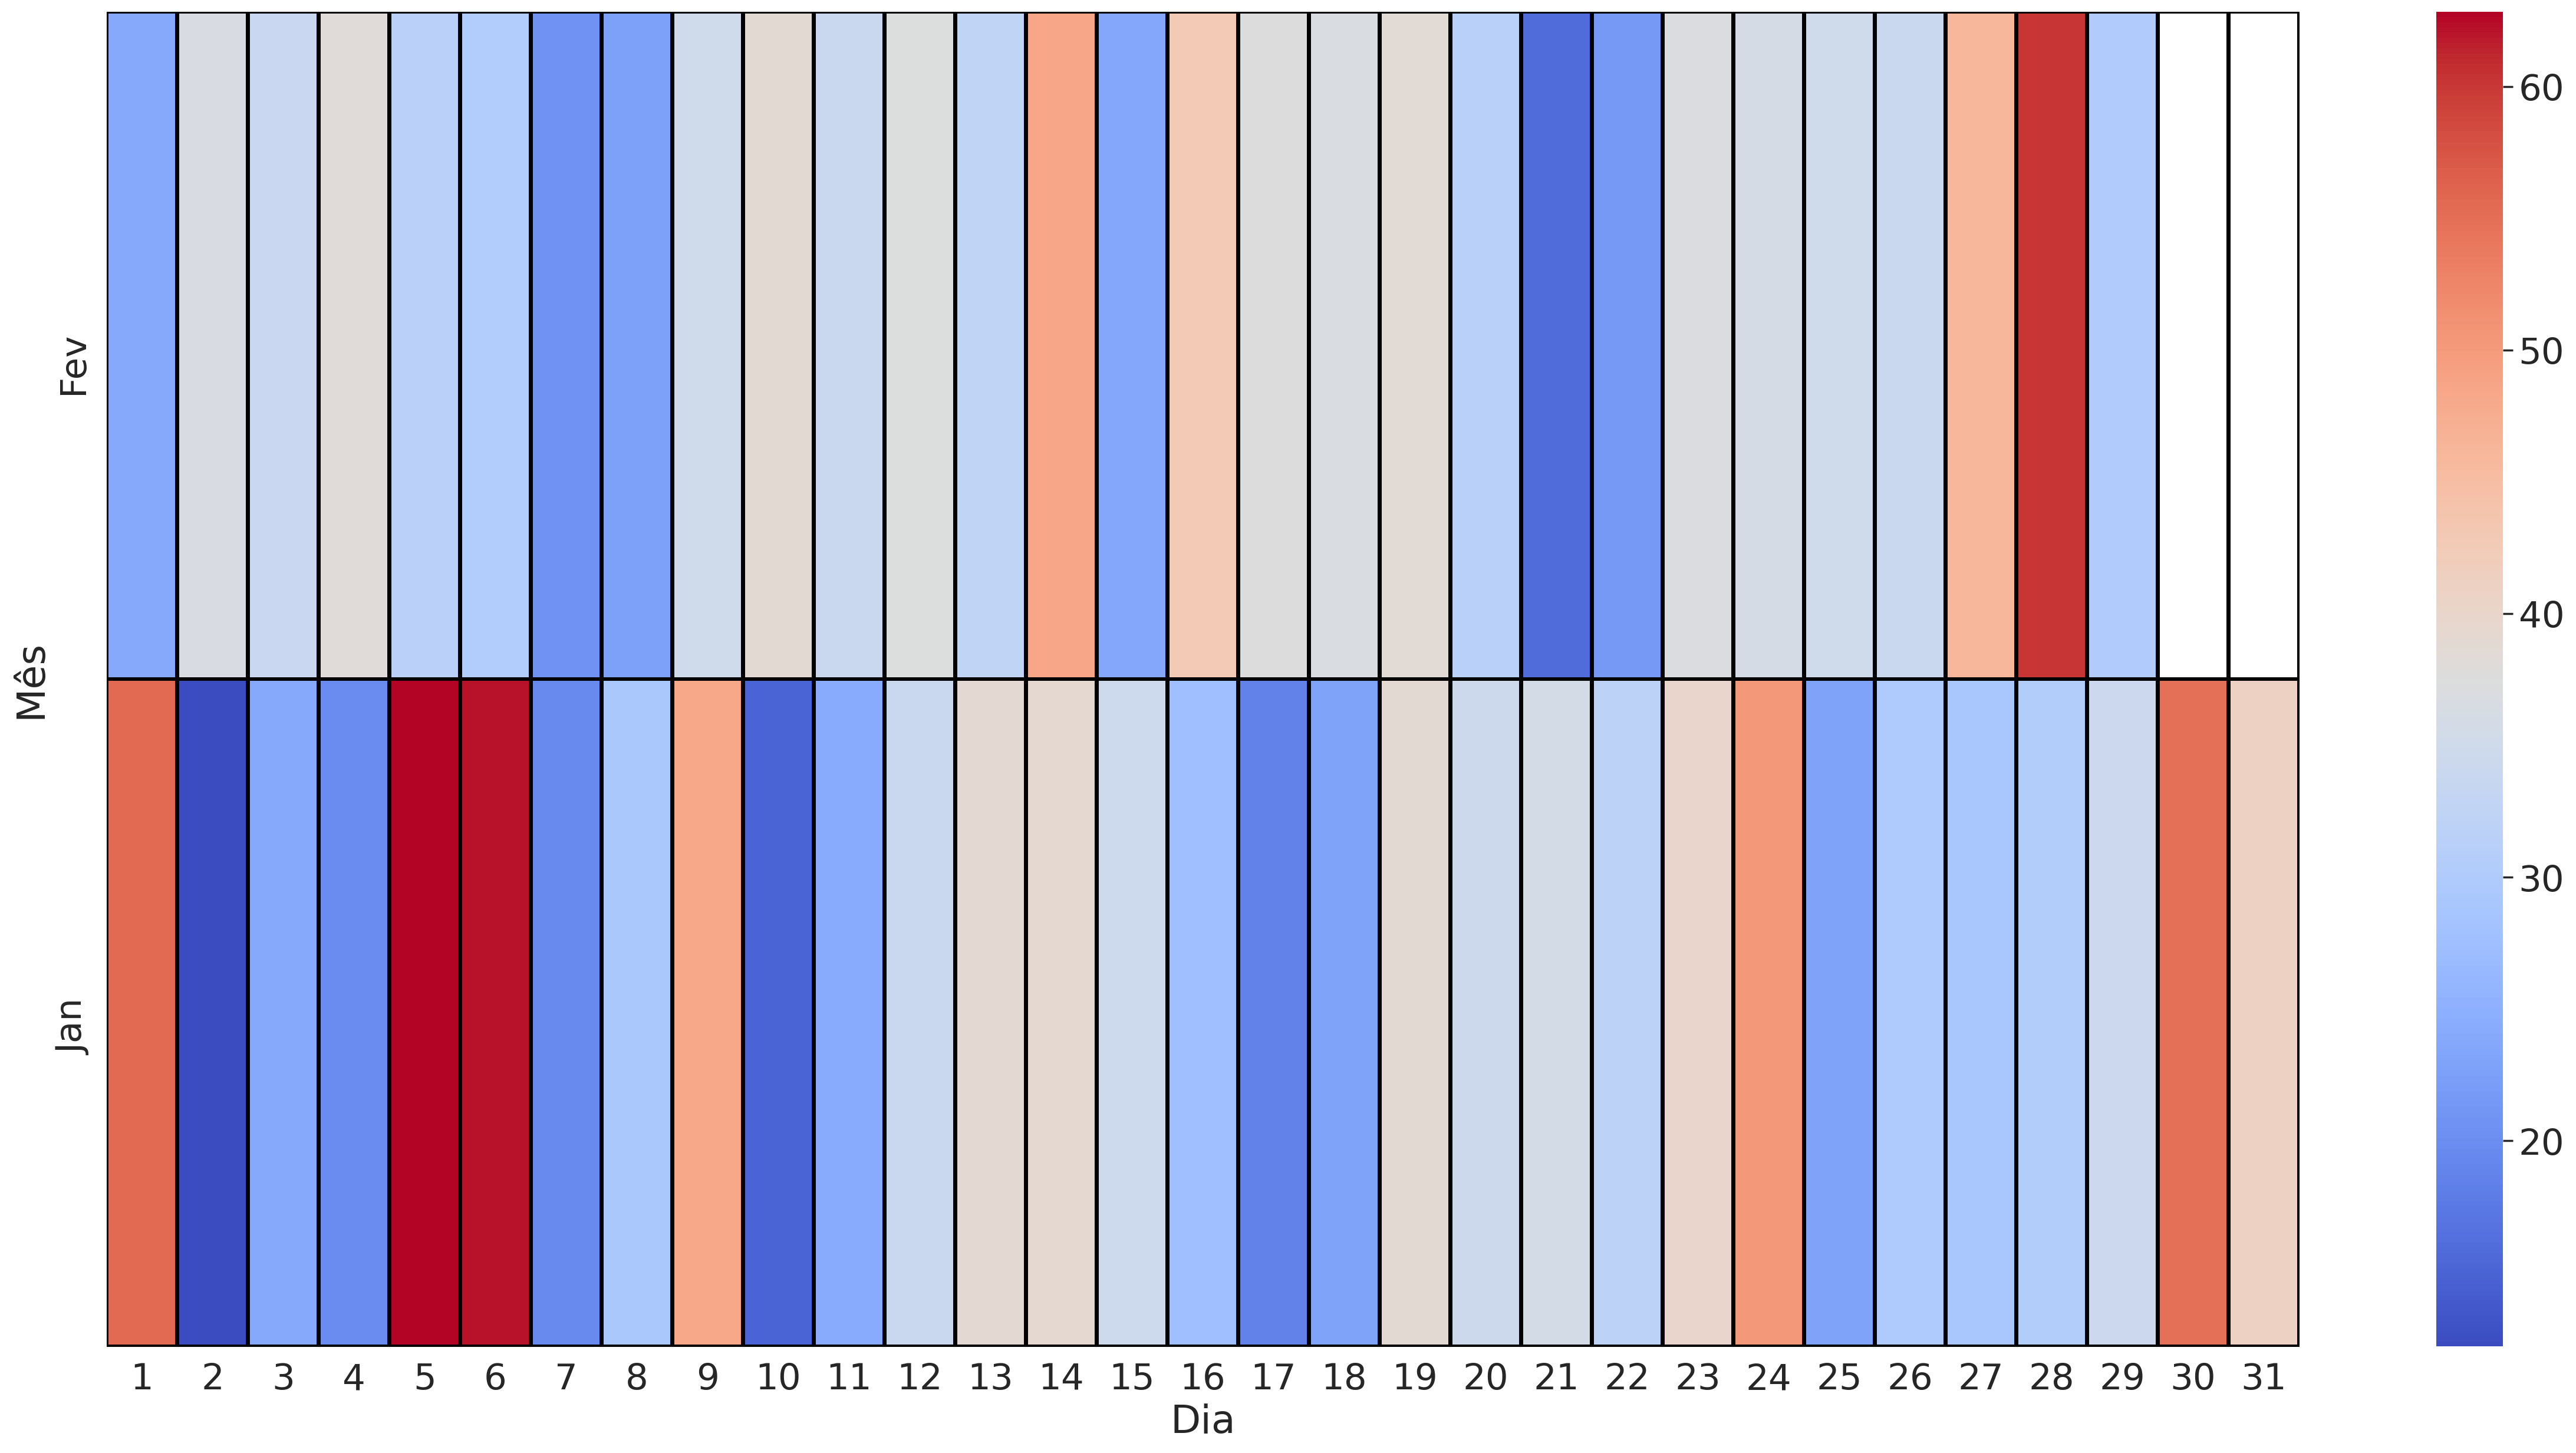

In [48]:
plt.figure(figsize=(30,15), dpi=200)

sns.heatmap(pivot_df2016, cmap='coolwarm', lw=2, linecolor='black')

In [49]:
df.head()

,Valor,timestamp,Dia,Mês,Ano,Hora,Minuto,datetime
0,1.000,2015-03-02T00:00,2,Mar,2015,0,0,2015-03-02 00:00:00
1,32.565,2015-03-02T01:00,2,Mar,2015,1,0,2015-03-02 01:00:00
2,38.347,2015-03-02T02:00,2,Mar,2015,2,0,2015-03-02 02:00:00
3,26.616,2015-03-02T03:00,2,Mar,2015,3,0,2015-03-02 03:00:00
4,17.202,2015-03-02T04:00,2,Mar,2015,4,0,2015-03-02 04:00:00


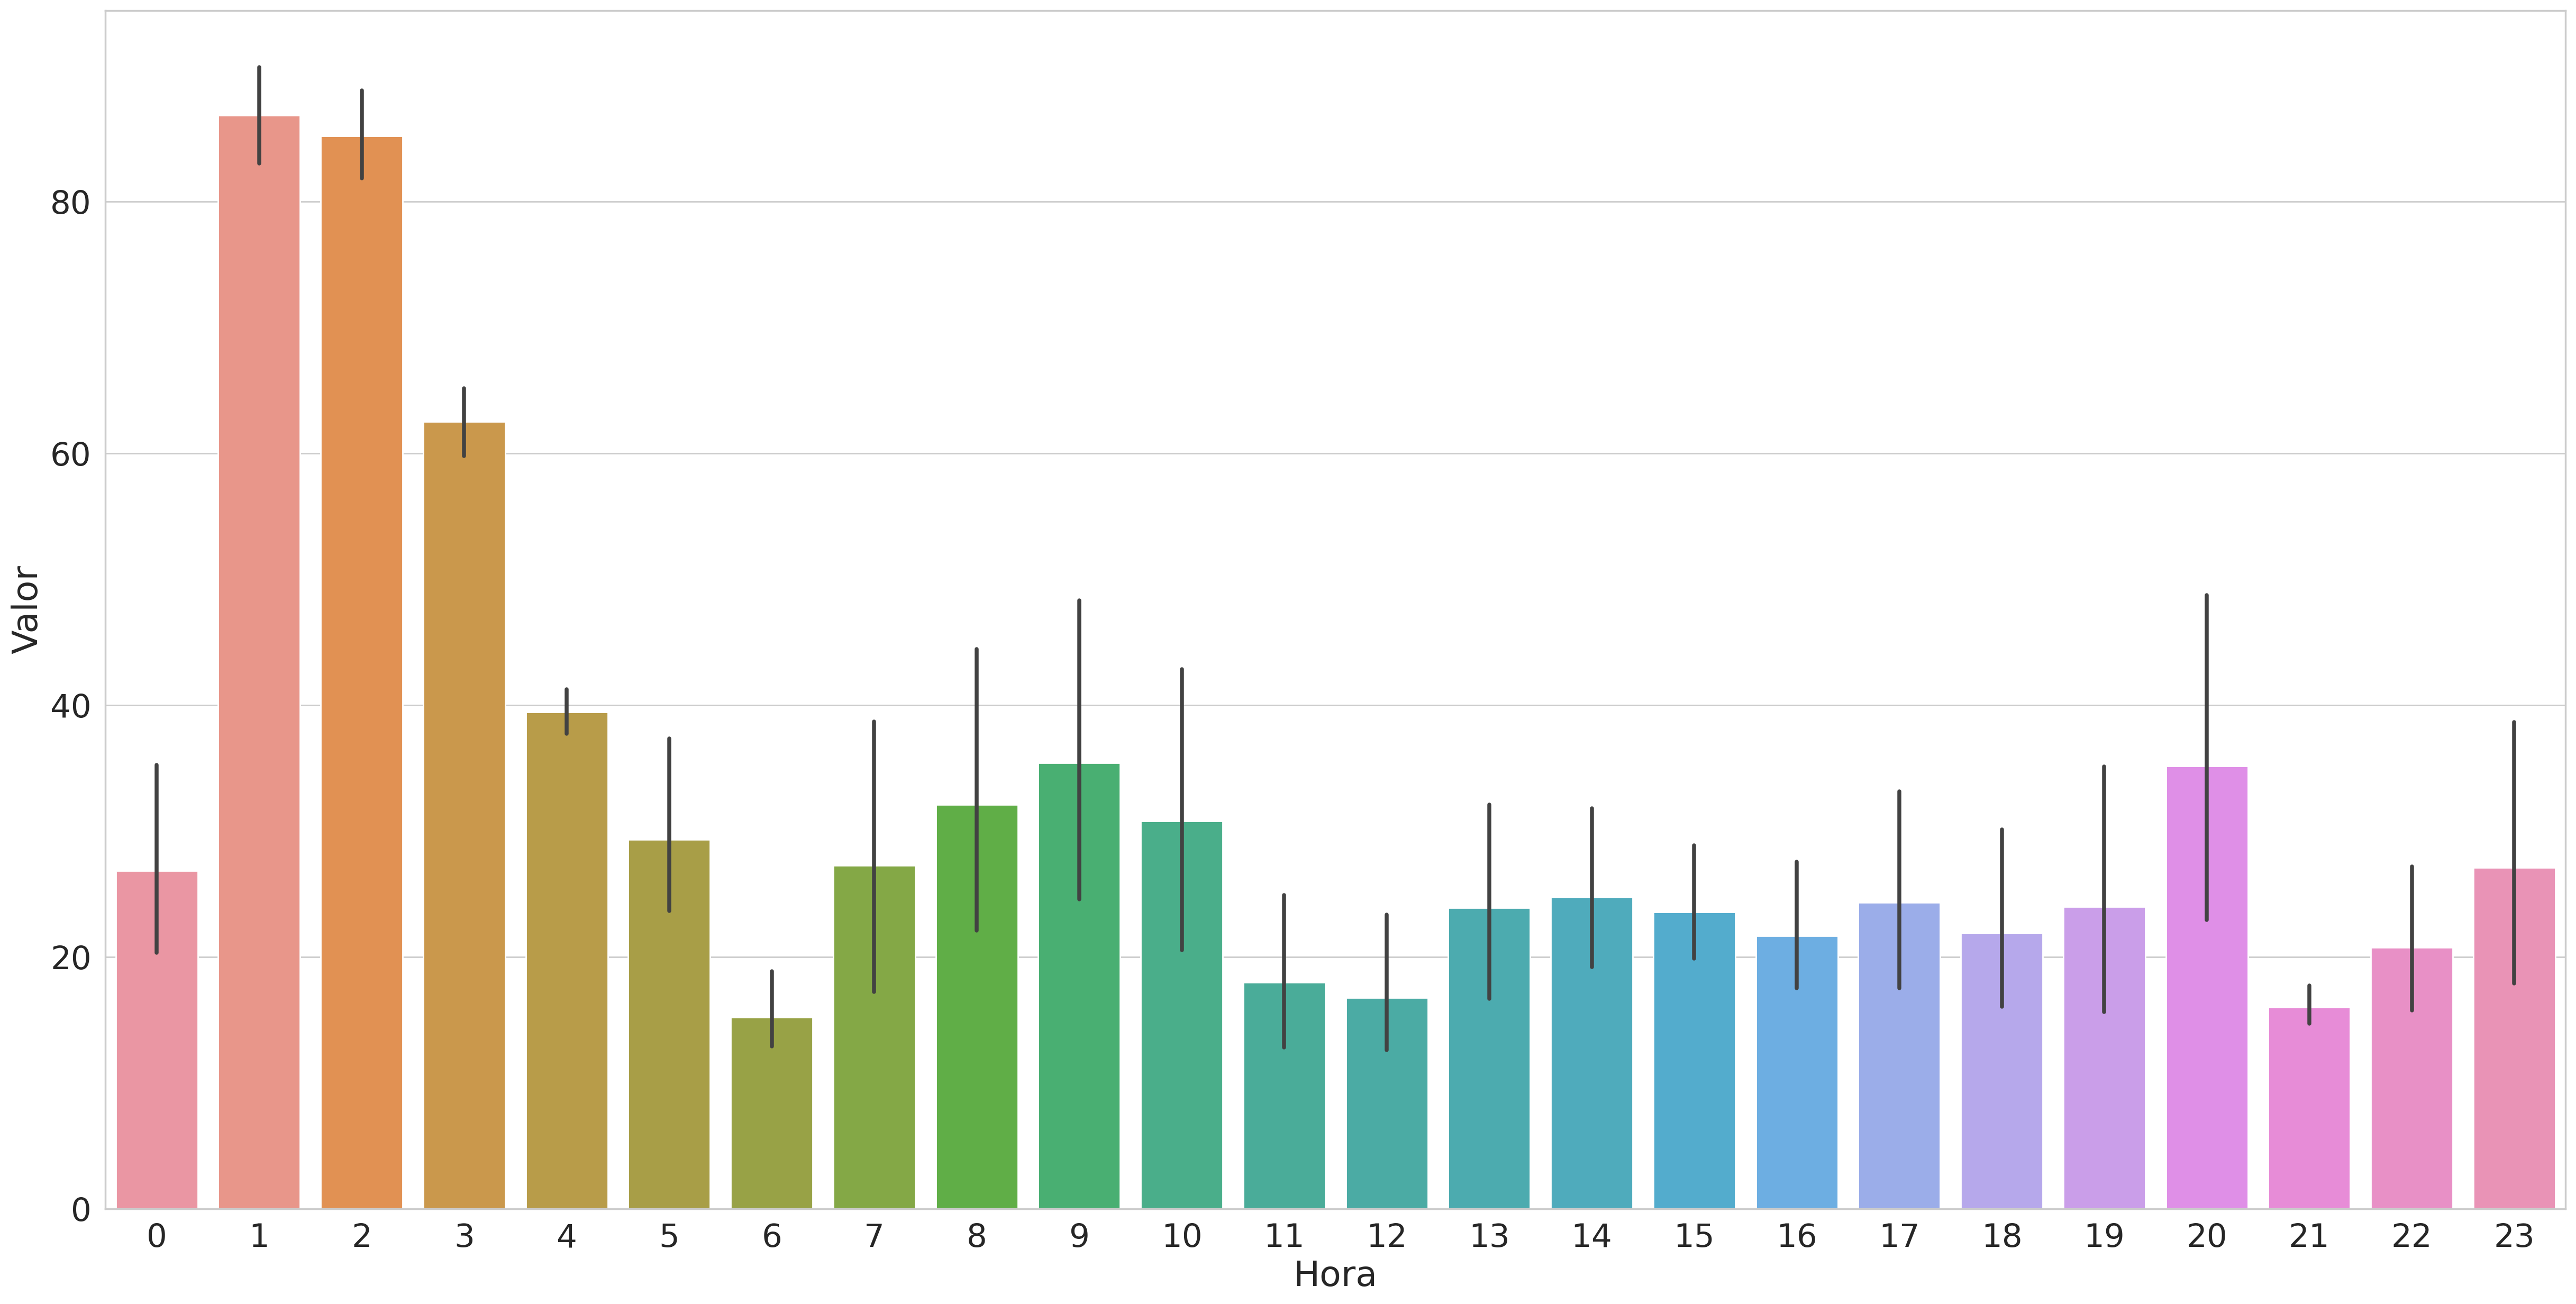

In [50]:
plt.figure(figsize=(30,15), dpi=200)

sns.barplot(x='Hora', y='Valor',data=df)

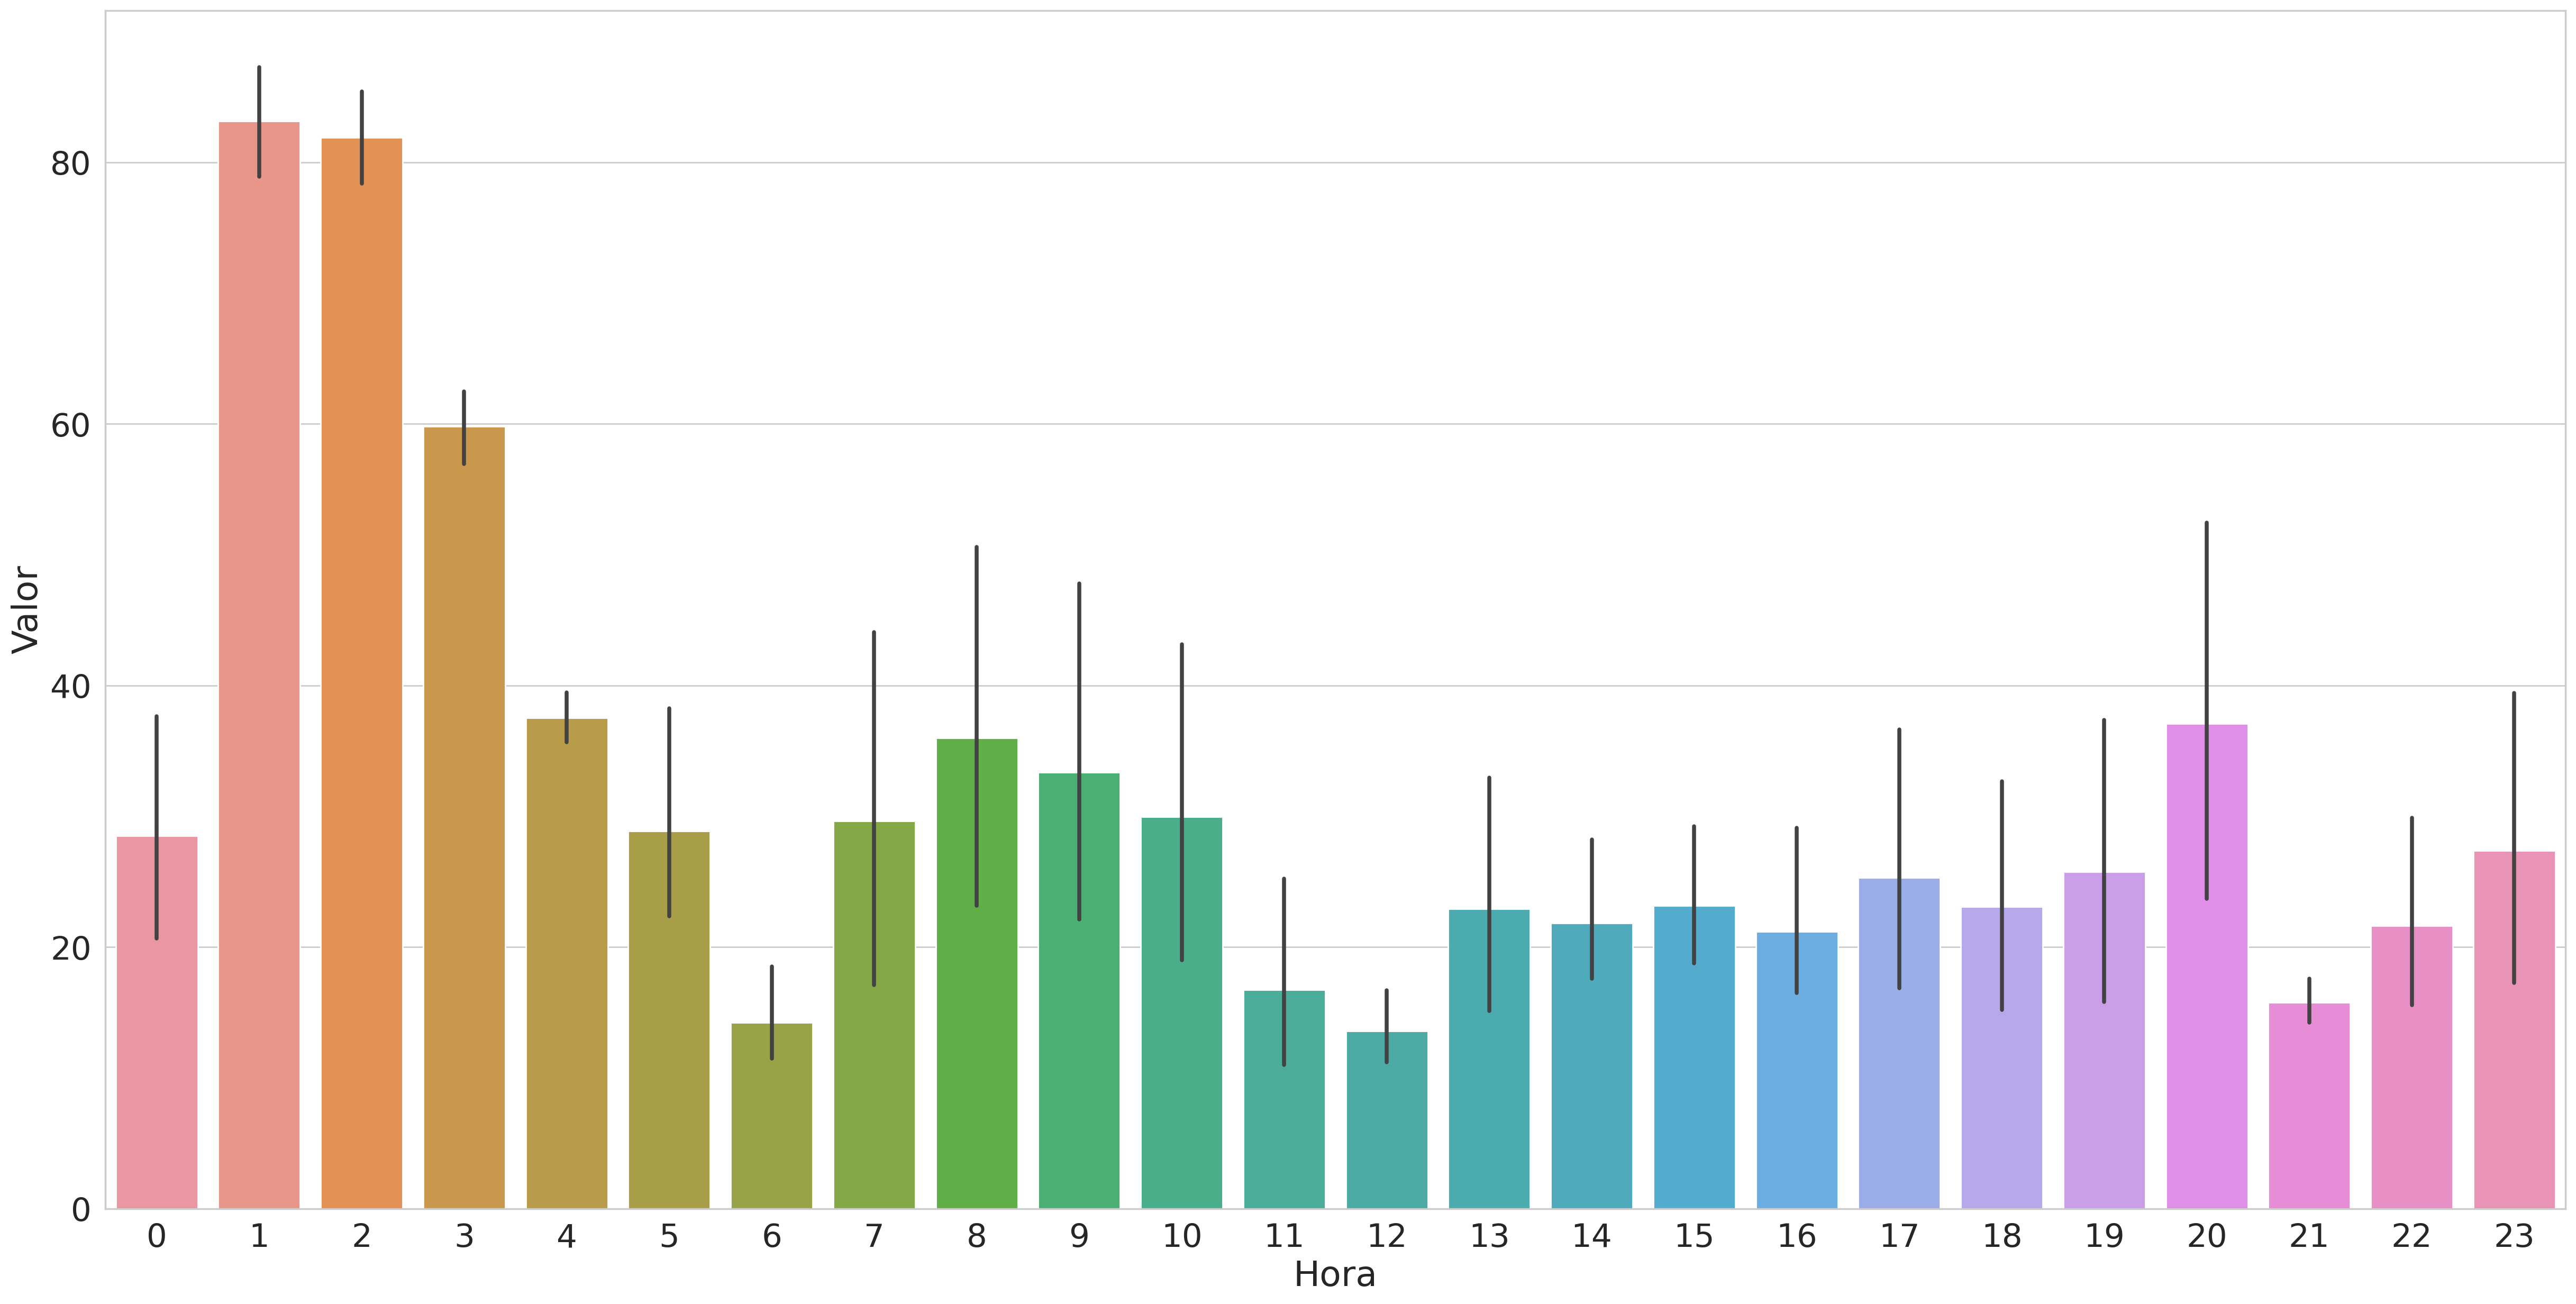

In [51]:
plt.figure(figsize=(30,15), dpi=200)

sns.barplot(x='Hora', y='Valor',data=df2015)

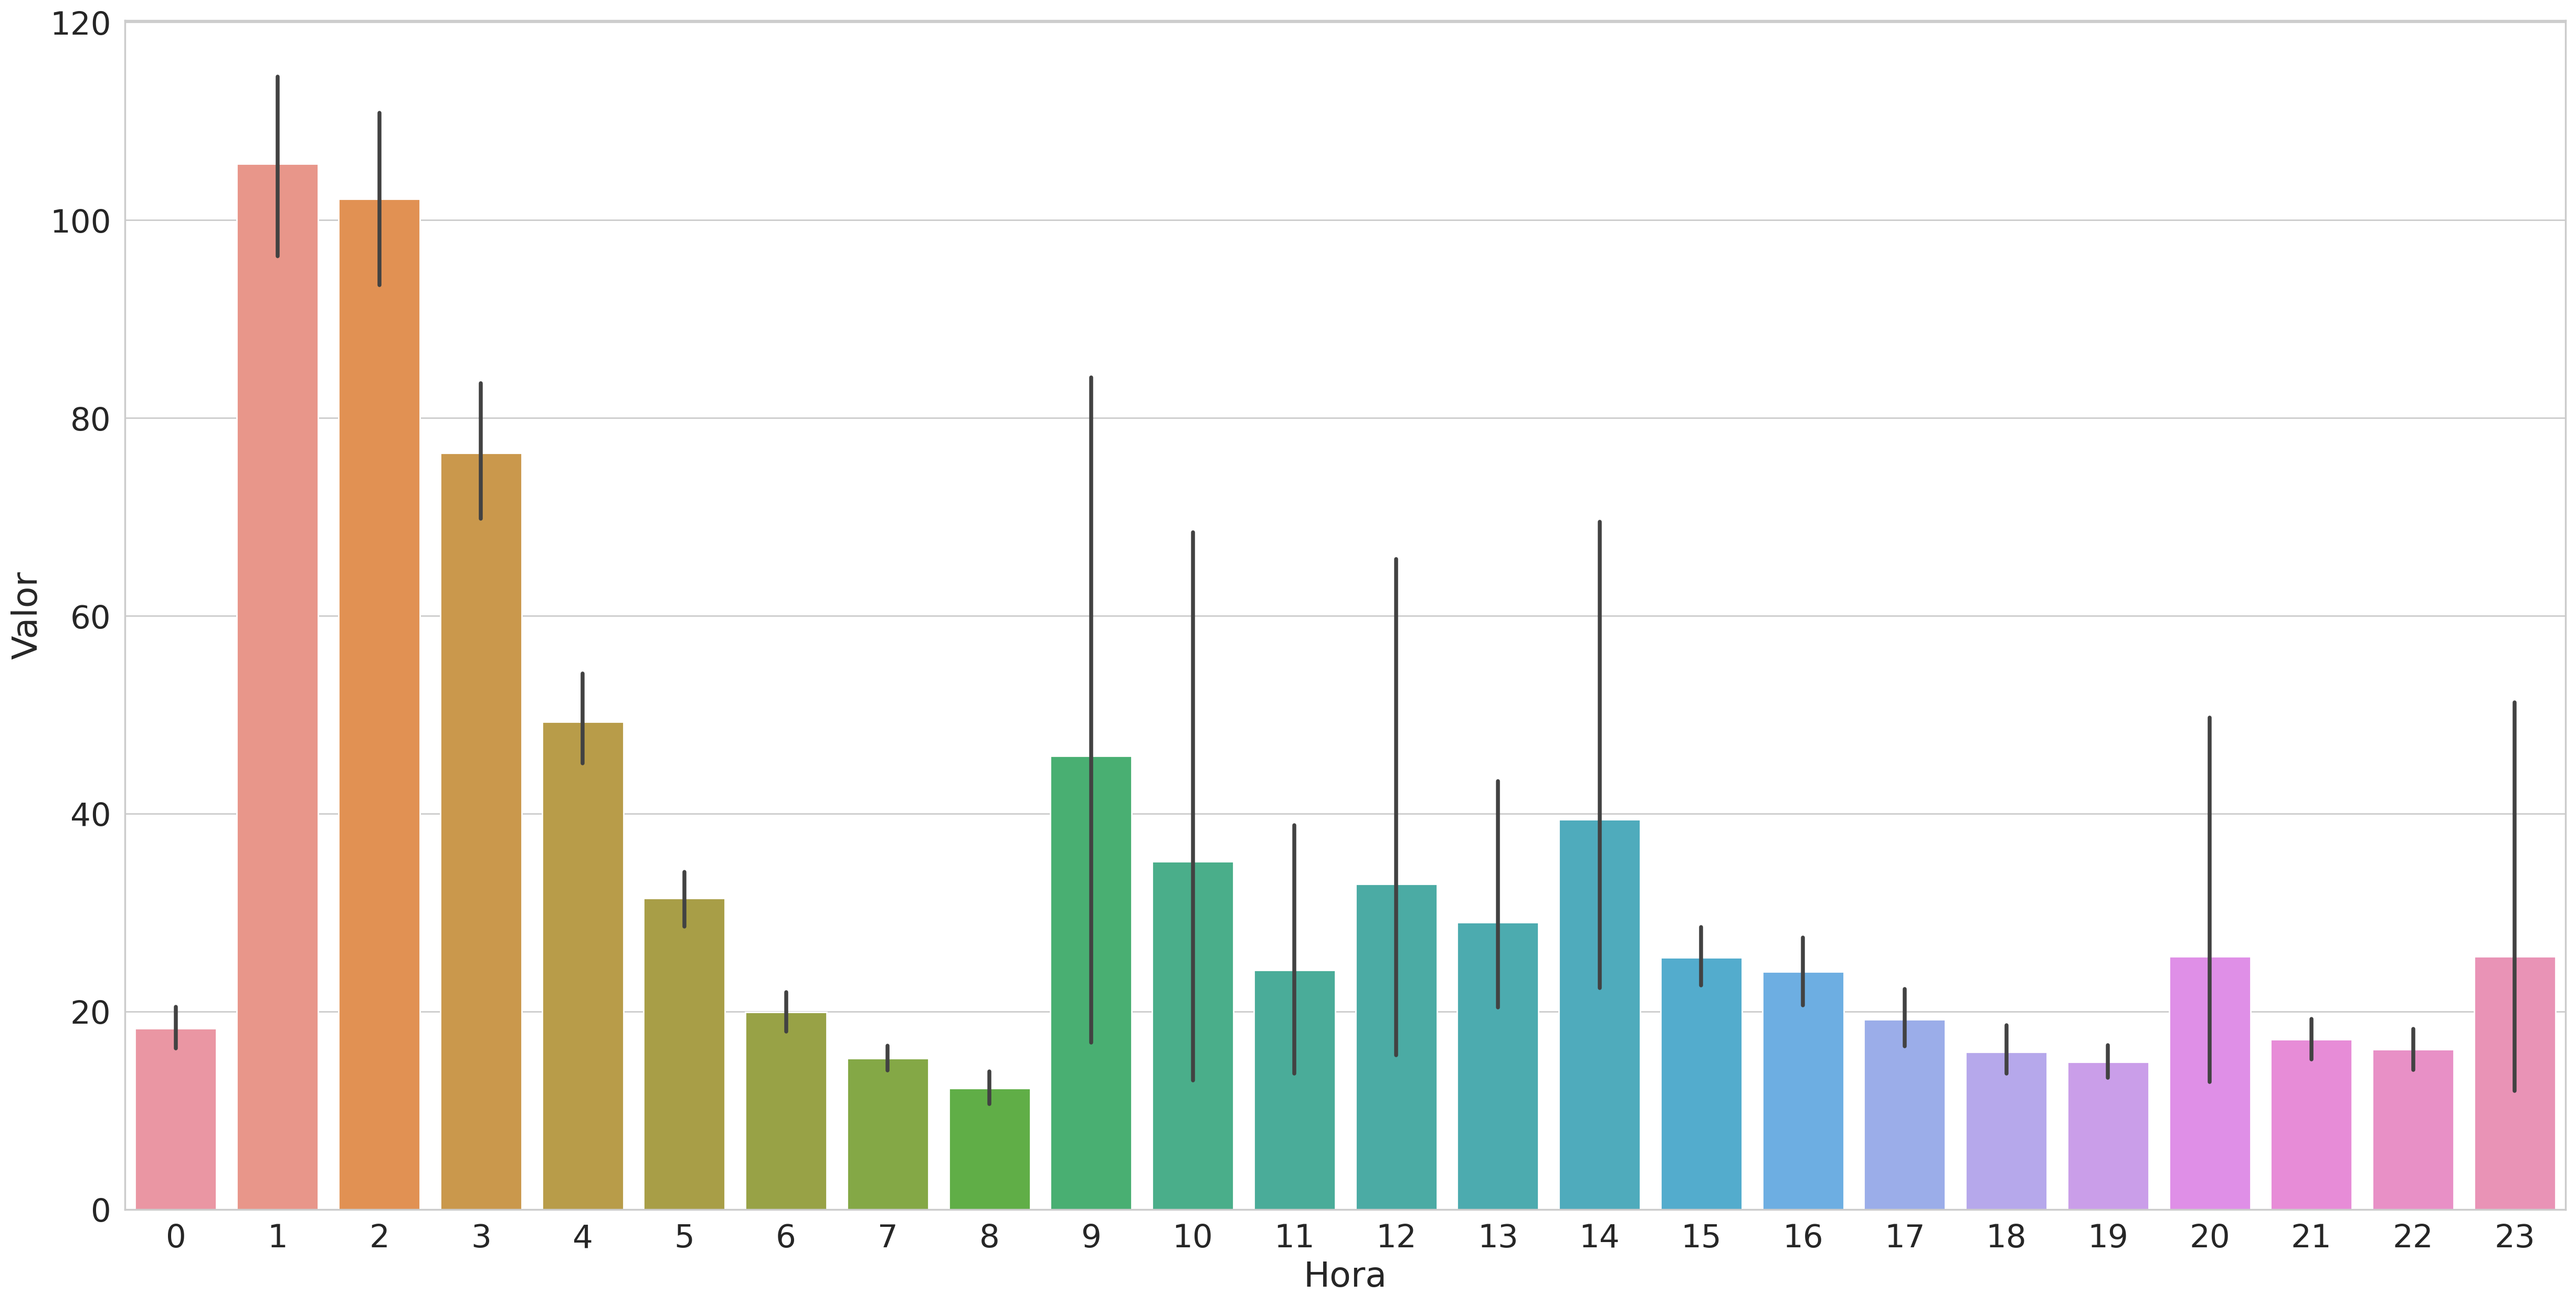

In [52]:
plt.figure(figsize=(30,15), dpi=200)

sns.barplot(x='Hora', y='Valor',data=df2016)

# Média movel

In [53]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'r', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'm--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'm--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)


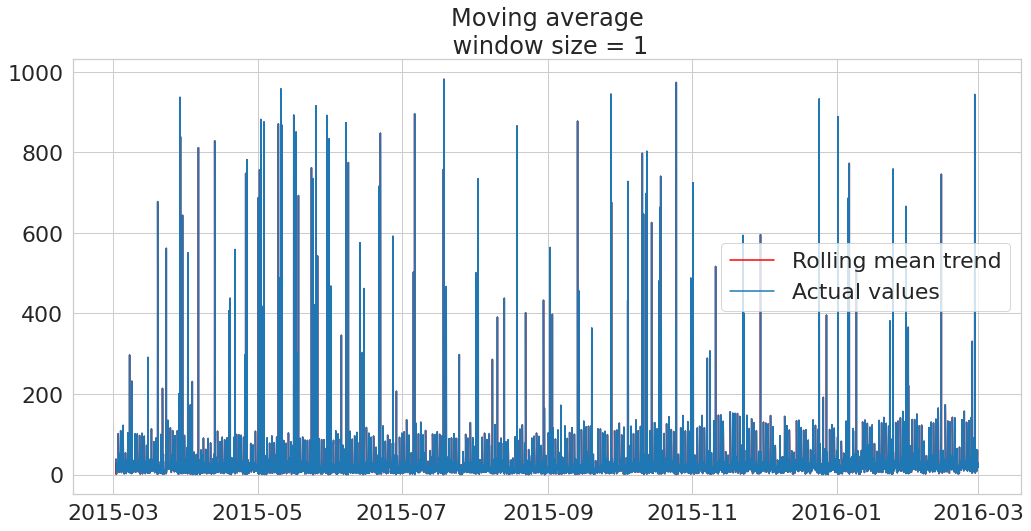

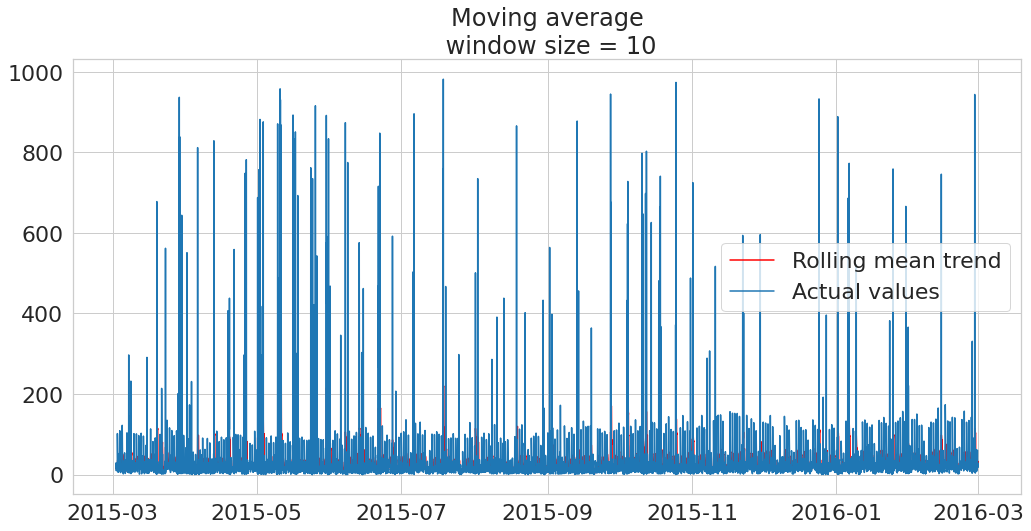

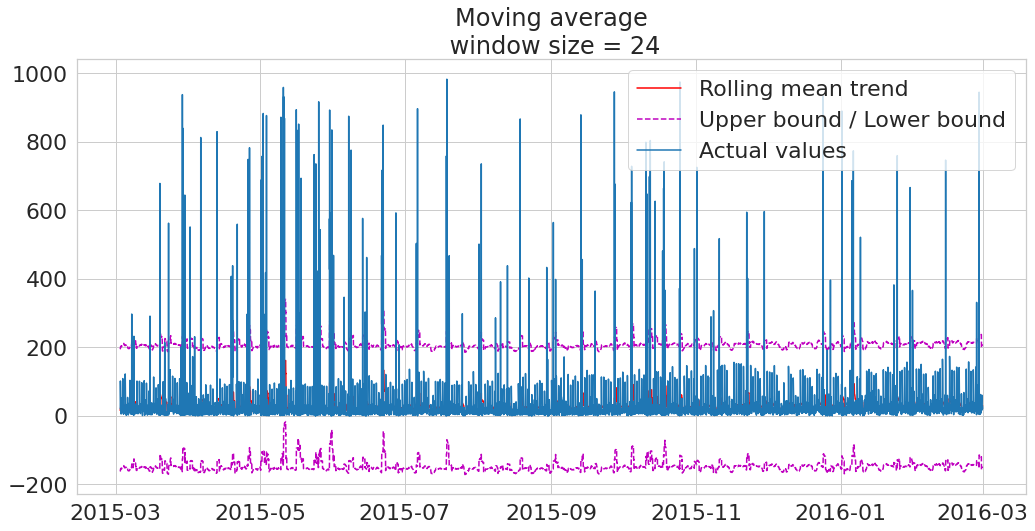

In [54]:
plot_moving_average(df.set_index('datetime').resample('H').mean()['Valor'].dropna(), 1)

plot_moving_average(df.set_index('datetime').resample('H').mean()['Valor'].dropna(), 10)

plot_moving_average(df.set_index('datetime').resample('H').mean()['Valor'].dropna(), 24, plot_intervals=True)

# Teste Dickey-Fuller e KPSS

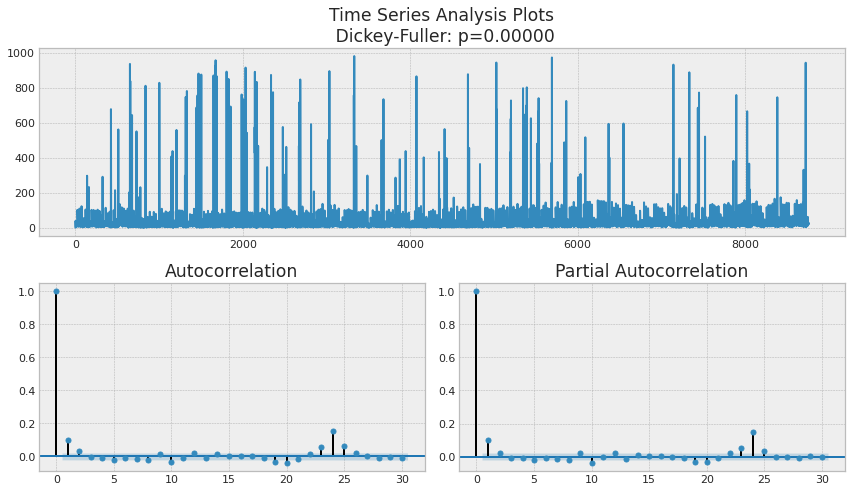

In [55]:
sns.set_context('notebook', font_scale = 1)

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(df['Valor'], lags=30)

In [56]:
p_value = sm.tsa.stattools.adfuller(df['Valor'])[1]
p_value

1.5822246418629686e-27

In [57]:
p_value2 = sm.tsa.stattools.kpss(df['Valor'])[1]
p_value2

# Tudo indica que é estacionária!

/home/fran/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/fran/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


0.1

# Decomposição

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://github.com/aarshayj/analytics_vidhya/blob/master/Articles/Time_Series_Analysis/Time_Series_AirPassenger.ipynb

In [58]:
df_without_zeroes = df.drop( df[ df['Valor'] == 0 ].index )

In [59]:
df_without_zeroes.isnull().sum()

Valor        0
timestamp    0
Dia          0
Mês          0
Ano          0
Hora         0
Minuto       0
datetime     0
dtype: int64

In [60]:
df_without_zeroes.head()

,Valor,timestamp,Dia,Mês,Ano,Hora,Minuto,datetime
0,1.000,2015-03-02T00:00,2,Mar,2015,0,0,2015-03-02 00:00:00
1,32.565,2015-03-02T01:00,2,Mar,2015,1,0,2015-03-02 01:00:00
2,38.347,2015-03-02T02:00,2,Mar,2015,2,0,2015-03-02 02:00:00
3,26.616,2015-03-02T03:00,2,Mar,2015,3,0,2015-03-02 03:00:00
4,17.202,2015-03-02T04:00,2,Mar,2015,4,0,2015-03-02 04:00:00


In [61]:
hourly_mean = df_without_zeroes.set_index('datetime').resample('H').mean()
weekly_mean = df_without_zeroes.set_index('datetime').resample('W').mean()

In [62]:
hourly_mean.head()

,Valor,Dia,Ano,Hora,Minuto
datetime,,,,,
2015-03-02 00:00:00,1.000,2.0,2015.0,0.0,0.0
2015-03-02 01:00:00,32.565,2.0,2015.0,1.0,0.0
2015-03-02 02:00:00,38.347,2.0,2015.0,2.0,0.0
2015-03-02 03:00:00,26.616,2.0,2015.0,3.0,0.0
2015-03-02 04:00:00,17.202,2.0,2015.0,4.0,0.0


In [63]:
hourly_mean.isnull().sum()

Valor     25
Dia       25
Ano       25
Hora      25
Minuto    25
dtype: int64

In [64]:
hourly_mean.columns

Index(['Valor', 'Dia', 'Ano', 'Hora', 'Minuto'], dtype='object')

In [65]:
for col in hourly_mean.columns:
    hourly_mean[col] = hourly_mean[col].fillna(hourly_mean[col].mean())

In [66]:
hourly_mean.isnull().sum()

Valor     0
Dia       0
Ano       0
Hora      0
Minuto    0
dtype: int64

In [67]:
#salvando dataset hourly_mean tratado

hourly_mean.to_csv('../../data/Fernando/hourly_mean.csv')

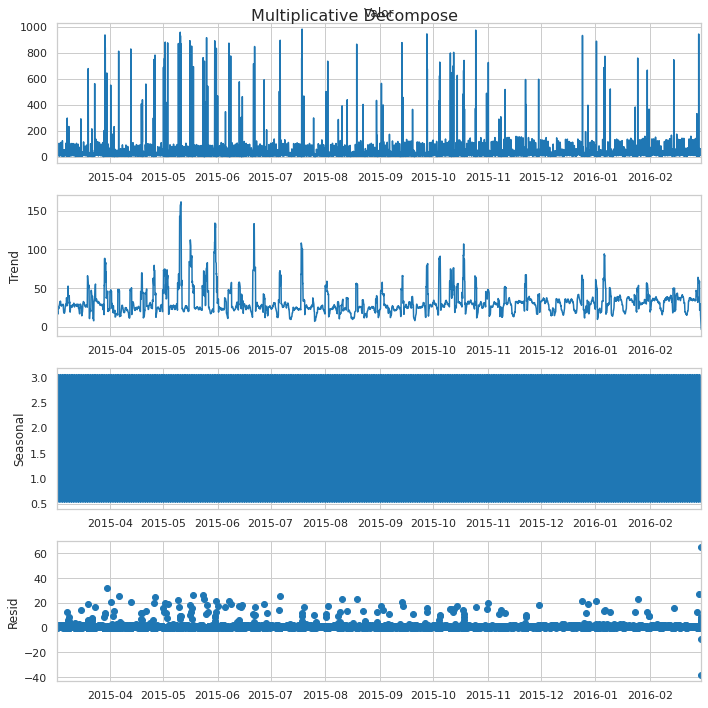

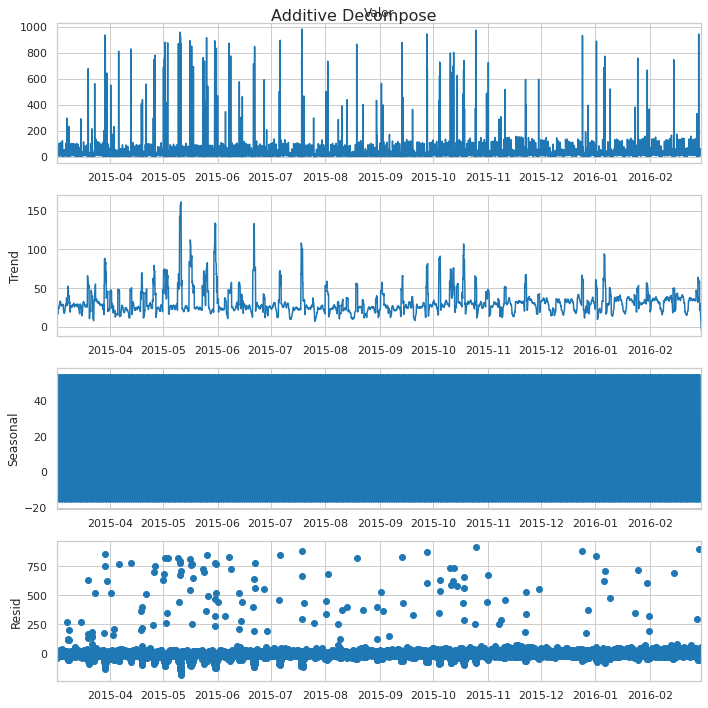

In [68]:
# Decomposição multiplicativa
result_mul = seasonal_decompose(hourly_mean['Valor'], model='multiplicative', extrapolate_trend='freq')

# Decomposição aditiva
result_add = seasonal_decompose(hourly_mean['Valor'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16)
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

# Transformando a série

## Logarítimica

In [69]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


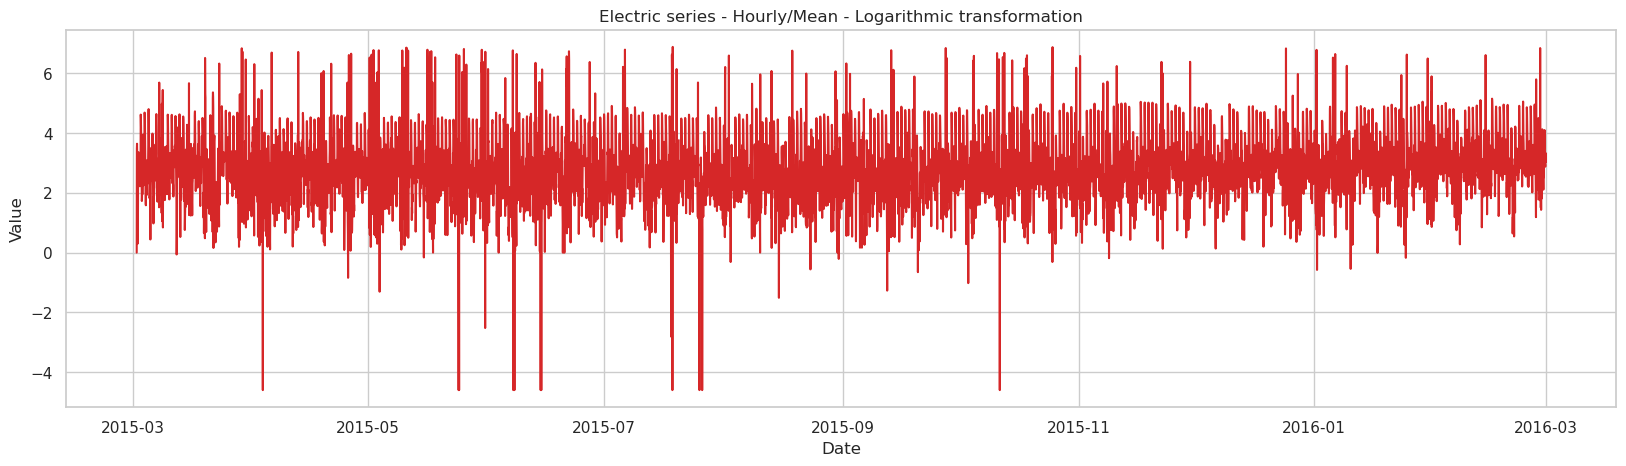

In [70]:
log_data = np.log(hourly_mean['Valor']).to_frame()
plot_df(log_data, x=log_data.index, y=log_data['Valor'], title="Electric series - Hourly/Mean - Logarithmic transformation")

## Retorno Logarítimico

In [71]:
hourly_mean_return_log = hourly_mean.copy()

In [72]:
hourly_mean_return_log['return-log'] = np.log(hourly_mean_return_log['Valor']) - np.log(hourly_mean_return_log['Valor'].shift(1))
hourly_mean_return_log.head()

,Valor,Dia,Ano,Hora,Minuto,return-log
datetime,,,,,,
2015-03-02 00:00:00,1.000,2.0,2015.0,0.0,0.0,NaN
2015-03-02 01:00:00,32.565,2.0,2015.0,1.0,0.0,3.483238
2015-03-02 02:00:00,38.347,2.0,2015.0,2.0,0.0,0.163438
2015-03-02 03:00:00,26.616,2.0,2015.0,3.0,0.0,-0.365164
2015-03-02 04:00:00,17.202,2.0,2015.0,4.0,0.0,-0.436487


In [73]:
hourly_mean_return_log.isnull().sum()

Valor         0
Dia           0
Ano           0
Hora          0
Minuto        0
return-log    1
dtype: int64

In [74]:
for col in hourly_mean_return_log.columns:
    hourly_mean_return_log[col] = hourly_mean_return_log[col].fillna(hourly_mean_return_log[col].mean())

In [75]:
hourly_mean_return_log.head()

,Valor,Dia,Ano,Hora,Minuto,return-log
datetime,,,,,,
2015-03-02 00:00:00,1.000,2.0,2015.0,0.0,0.0,0.000346
2015-03-02 01:00:00,32.565,2.0,2015.0,1.0,0.0,3.483238
2015-03-02 02:00:00,38.347,2.0,2015.0,2.0,0.0,0.163438
2015-03-02 03:00:00,26.616,2.0,2015.0,3.0,0.0,-0.365164
2015-03-02 04:00:00,17.202,2.0,2015.0,4.0,0.0,-0.436487


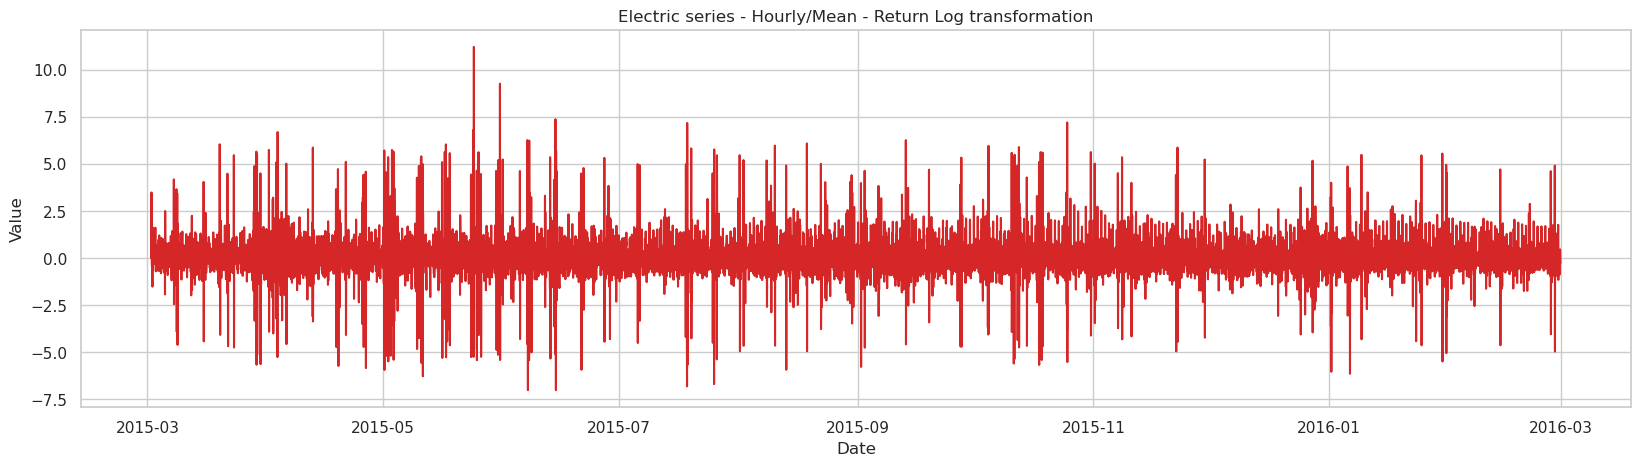

In [76]:
plot_df(hourly_mean_return_log, x=hourly_mean_return_log.index, y=hourly_mean_return_log['return-log'], title="Electric series - Hourly/Mean - Return Log transformation")

In [77]:
#salvando o novo df

hourly_mean_return_log.to_csv('../../data/Fernando/hourly_mean_return_log.csv')

## teste Dickey-Fuller e KPSS na série transformada

### Logarítimica

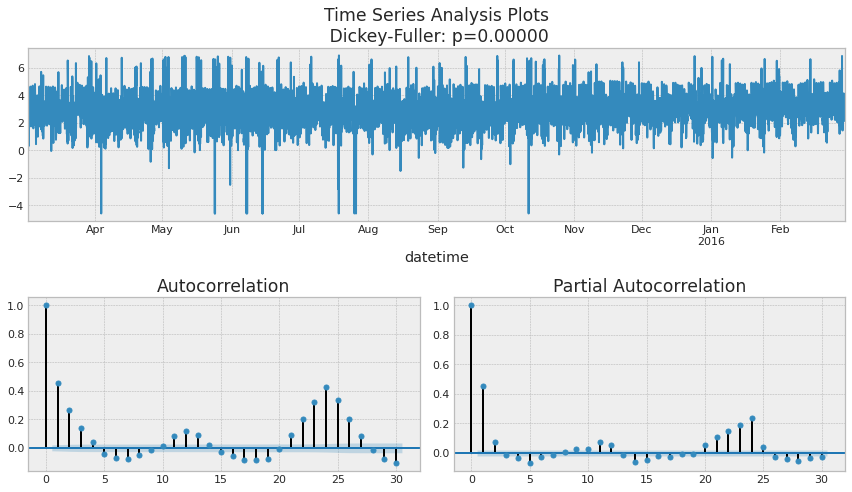

In [78]:
tsplot(log_data['Valor'], lags=30)

In [79]:
p_value_transformed_log = sm.tsa.stattools.adfuller(log_data['Valor'])[1]
p_value_transformed_log

3.569565042410417e-24

In [80]:
p_value_transformed2_logKPSS = sm.tsa.stattools.kpss(log_data['Valor'])[1]
p_value_transformed2_logKPSS

/home/fran/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/fran/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


0.01

In [81]:
p_value / p_value_transformed_log

0.00044325418449149236

In [82]:
p_value2 / p_value_transformed2_logKPSS

10.0

In [83]:
#salvando o novo df

log_data.to_csv('../../data/Fernando/hourly_mean_log.csv')

In [84]:
log_data.head()

,Valor
datetime,
2015-03-02 00:00:00,0.000000
2015-03-02 01:00:00,3.483238
2015-03-02 02:00:00,3.646676
2015-03-02 03:00:00,3.281513
2015-03-02 04:00:00,2.845026


### Retorno Logarítmico

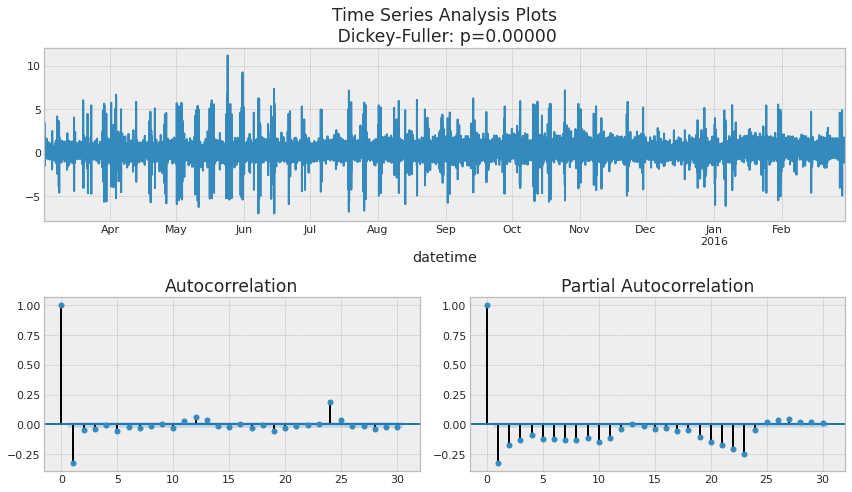

In [85]:
tsplot(hourly_mean_return_log['return-log'], lags=30)

In [86]:
p_value_transformed_return_log = sm.tsa.stattools.adfuller(hourly_mean_return_log['Valor'])[1]
p_value_transformed_return_log

1.5186999384716146e-27

In [87]:
p_value_transformed_return_logKPSS = sm.tsa.stattools.kpss(hourly_mean_return_log['Valor'])[1]
p_value_transformed_return_logKPSS

/home/fran/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/fran/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


0.1

In [88]:
p_value / p_value_transformed_return_log

1.0418283439553464

In [89]:
p_value2 / p_value_transformed_return_logKPSS

1.0